---
Zurück zur Übersicht | [Inhalt](00_Inhalt.ipynb)

---

In [1]:
# Für diese Notebook benötigte Pakete:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# Dynamische Messsysteme

## Inhalt
***

### [Linear zeitinvariante (LZI) Systeme](#Sec-LZI_system)
### [System-Identifizierung](#Sec-System-Identifizierung)
* [White Box](#SubSec-white_box)
    * [Aufstellen der Differentialgleichung](#SubSubSec-Aufstellen_der_Differentialgleichung)
    * [Lösen der Differentialgleichung](#SubSubSec-Lösen_der_Differentialgleichung)

* [Black box](#SubSec-black_box)
    * [Interpretation der Sprungantwort](#SubSubSec-Interpretation_der_Sprungantwort)
    * [Impulsantwort und Faltung im Zeitraum](#SubSubSec-Impulsantwort_und_Faltung)

### [Interpretation im Frequenzraum](#Sec-Interpretation_im_Frequenzraum)
* [Herleitung der Übertragungsfunktion](#SubSec-übertragungsfunktion)
* [Interpretation der Übertragungsfunktion: Bode Diagramm](#SubSec-bode)
* [Kombination von Übertragungsfunktionen: Faltung im Frequenzraum](#SubSec-kombi_bandpass)
* [Anlegen von Testfunktionen](#SubSec-freq_test)
* [Verhalten von Systemen 2. Ordnung](#SubSec-2ndorder_freq)


***

## Linear zeitinvariante (LZI) Systeme 
<a id="Sec-LZI_system"></a>

LTI Systeme sind wichtig, da sie zwar sehr vereinfacht sind, aber gut zu lösen sind. Sie sind in der Tat die einzigen Systeme, die wir lösen können (mittels Differentialgleichungen). 

Für ein LTI System können Ausgangssignale vorhergesagt werden, die man für ein bestimmtes Eingangssignale erwarten würde. Das gleiche gilt auch für *Veränderungen* von Eingangssignalen. 

Das liegt daran, dass LTIs bestimmte Eigenschaften haben: *Superposition, Homogenität und Zeitinvarianz*.
Im Folgenden sei $h$ ein Operator, der eine lineare Abbildung zwischen Eingangsvektor $x(t)$ und dem Ausgang eines Systems, Vektor $y(t)$, darstellt. 
Für ein **lineares System** gelten allgemein folgende Eigenschaften:
* **Homogenität**: Wenn $x(t)$ mit Faktor $a$ skaliert wird, dann wird $y(t)$ ebenso skaliert
    * Ein Sprung der Größe $A$ produziert eine Schwingung mit Größe $B$
    * Da h(x) linear ist, wird ein verdoppelter Sprung am Eingang, also $2A$ zu einer Verdopplung am Ausgang, $2B$, führen
* **Superposition** bedeutet Additivität: Addiere zwei Eingangssignale, $A$ und $B$ zusammen, sprich $A+B$, dann ist die Antwort des linearen Systems auch die Summe der individuellen Ausgänge ($a$ und $b$), also $a+b$. 
* **Zeitinvariant**: Das Systeme verhält sich immer gleich, egal wann in der Zeit es durchgeführt wird.
    * Wird das Eingangssignal $$x(t) um $T$ verschoben, dann ist auch das Ausgangssignal um $T$ verschoben.

In Realität gibt es fast immer Abweichungen von diesen Idealvorstellungen. D.h. wir können mit LTIs Eingänge eines Signals skalieren, verschieben und summieren, aber sie entsprechen niemals einem realen System. Warum sind sie dann so wichtig? Richard Feynman sagte damals: „Linear Systems are important, because we can solve them“. 
Selbst wenn LTI nicht real ist, so können wir reale Probleme sehr gut *annähern* indem wir LTI Analysen durchführen.
Das heißt, stell immer sicher, dass dein System für einen bestimmten Bereich linear funktioniert. 

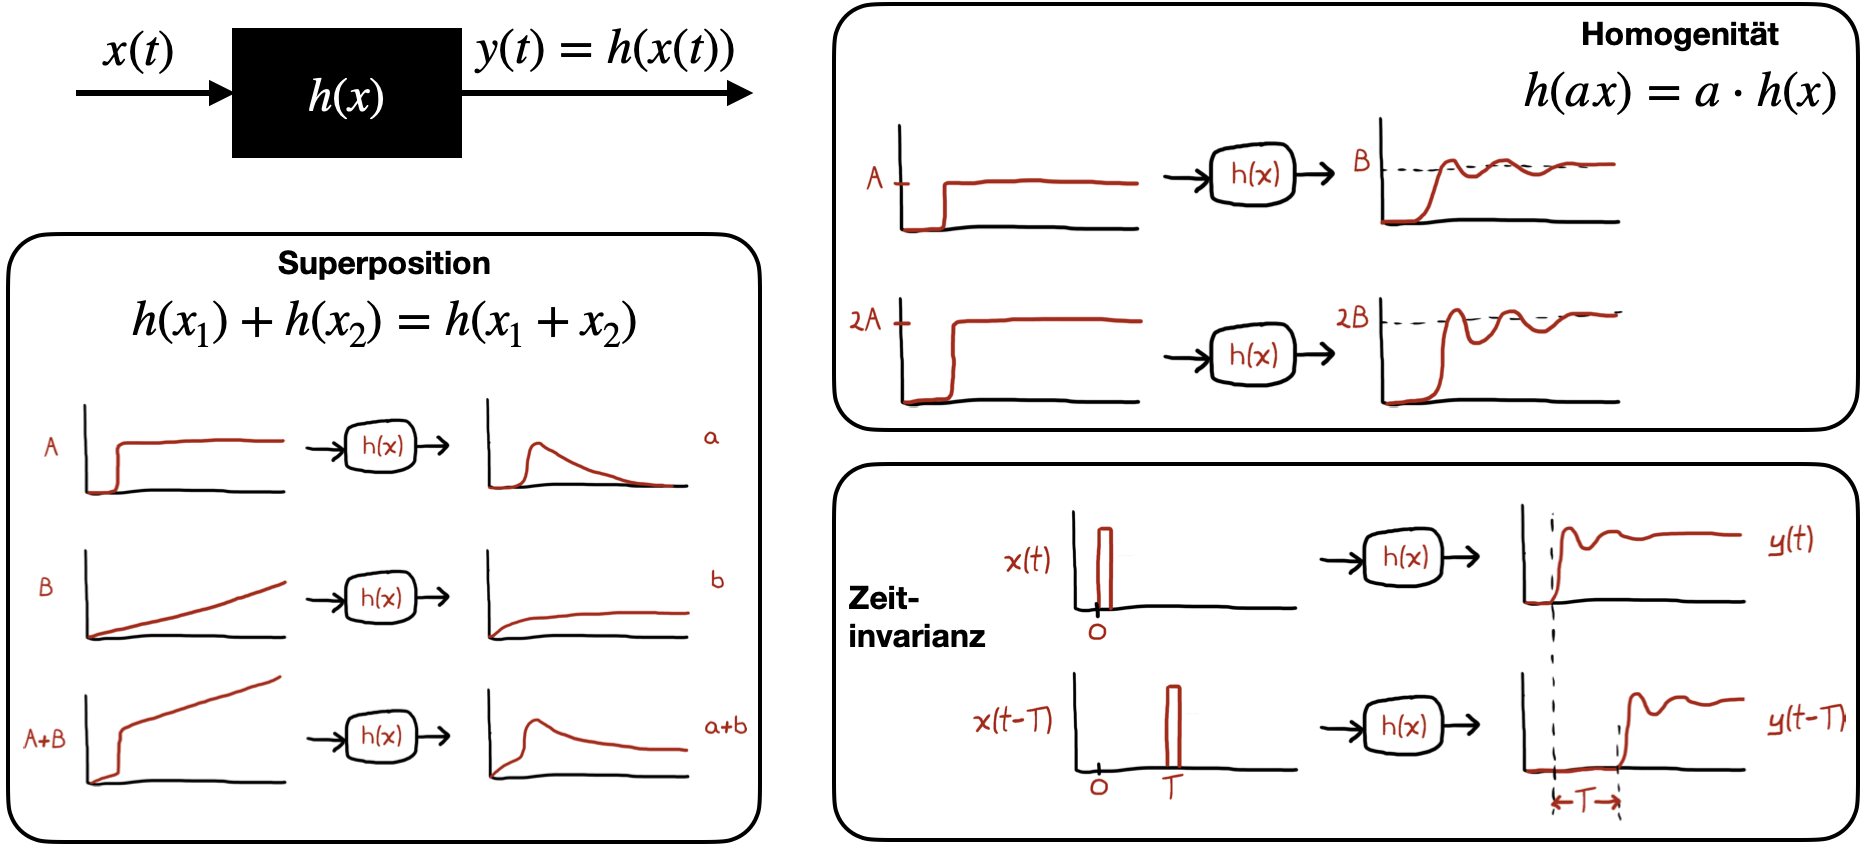

In [2]:
Image("pictures/LZI.png", width=750)

## System-Identifizierung
<a id="Sec-System-Identifizierung"></a>

Jedes Messsystem hat eine spezifische Übertragungsfunktion $h(t)$, welche, angewendet auf ein Eingangssignal $x(t)$, ein Ausgangssignal $y(t)$ liefert. Im Allgemeinen kann man drei Probleme in der Praxis erkennen, jenachdem welche Informationen einem vorliegen:

1. $x(t)$ und $h(t)$ sind gegeben -> $y(t)$ ist gesucht: Dies ist das **Simulationsproblem**
    * Anhand von Simulationen kann der Ausgang eines Systems vorhergesagt werden.
2. $h(t)$ und $y(t)$ sind gegeben -> $x(t)$ ist gesucht: Dies ist das **Kontrollproblem**
    * Dieses Problem wird man in der Regelungstechnik häufig antreffen, wo eine Regelgröße am Eingang des Mess- bzw. Regelsystems gesucht wird um einen stabilen Zustand zu erreichen.
3. $u(t)$ und $y(t)$ gegeben -> $h(t)$ ist gesucht: Dies ist das **System-Identifizierungsproblem**
    * Hier wollen wir das Messsystem charaktisieren, was unter anderem durch 2 Methoden möglich ist: Mittels Messungen der Eingangs- und Ausgangsgröße, oder mittels Aufstellen von Differentialgleichungen (Systemtheorie).
    
Während Problem 1 und 2 Bestandteil anderer Vorlesungen oder Themengebiete ist, wollen wir uns im Folgenden mit dem Problem 3 befassen. Hier wollen wir im Folgenden zwei Möglichkeiten betrachten, mittels welcher $h(t)$ bestimmt werden kann. Die beiden Methoden werden im folgenden mit **black box** und **white box** bezeichnet. 

In allen Kapiteln wird der Inhalt am Beispiel eines Tiefpasses 1. Ordnung noch einmal konkreter erläutert.

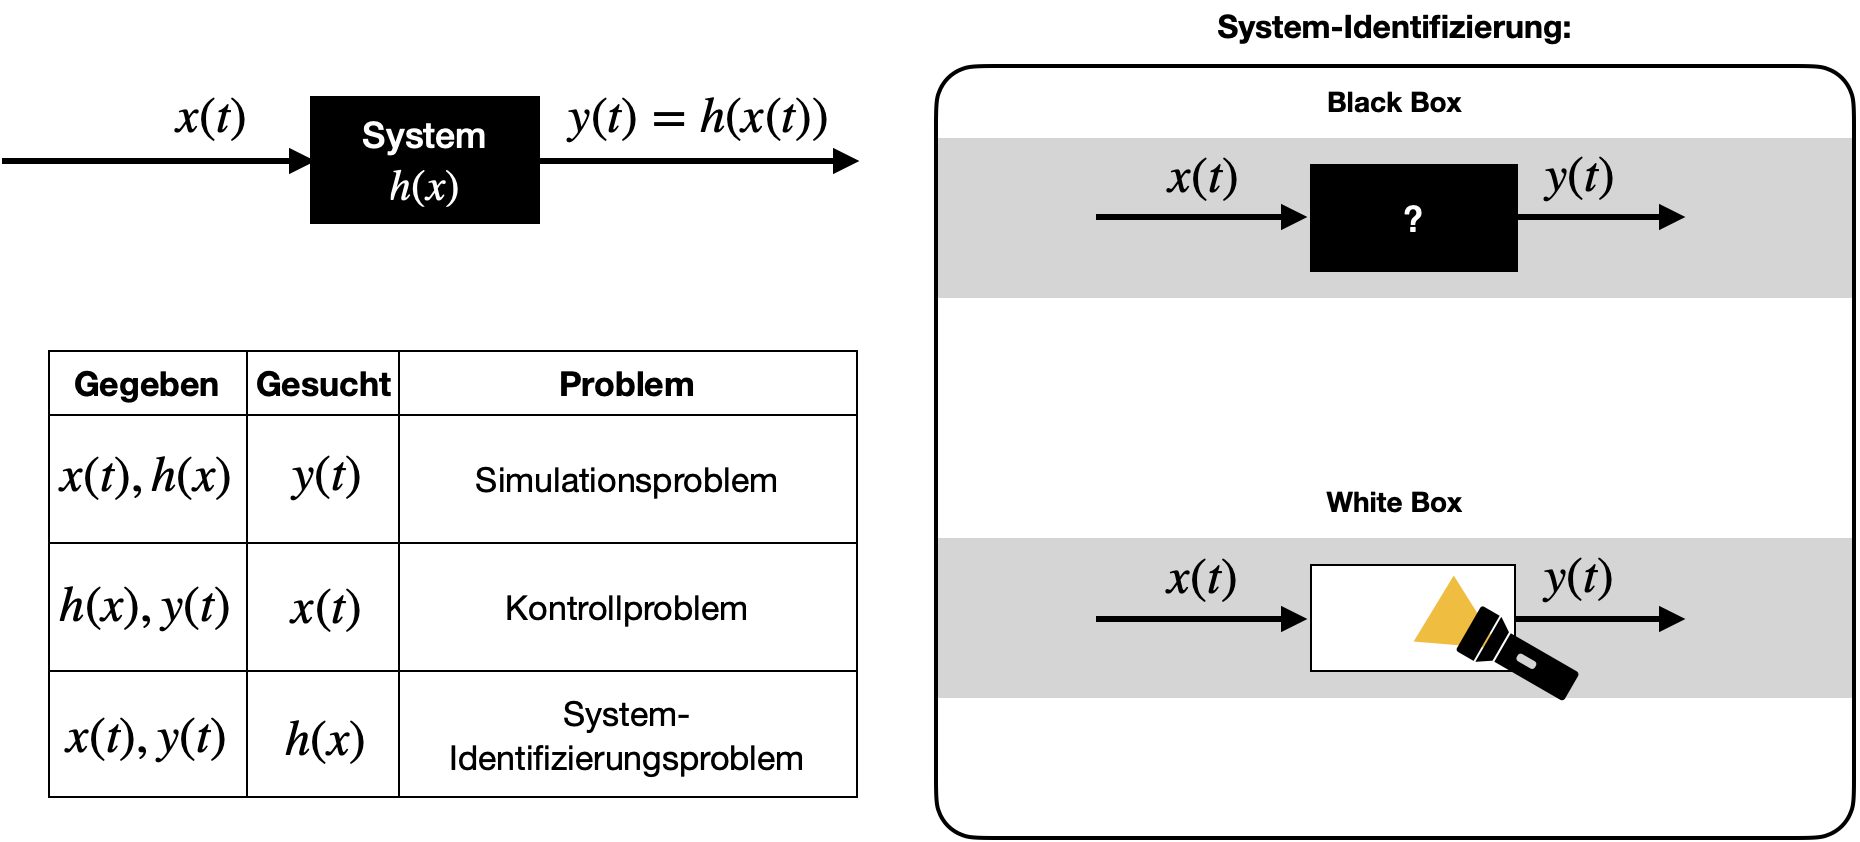

In [3]:
Image("pictures/3probleme.png", width=750)

### White Box
<a id="SubSec-white_box"></a>

Mit dem *white box*-Verfahren lösen wir das System-Identifizierungsproblem indem wir genau analysieren, aus welchen Komponenten unser System besteht. Anhand eines Tiefpasses 1. Ordnung wollen wir uns die Vorgehensweise einmal ansehen. 

#### Aufstellen der Differentialgleichung
<a id="SubSubSec-Aufstellen_der_Differentialgleichung"></a>
In diesem Falle gucken wir in unser System rein. Wir sehen die elektronische Schaltung bestehend aus einer Reihenschaltung von Widerstand mit Wert $R$ und Kondensator mit Kapazität $C$. Am Eingang liegt die Spannung $u_e(t)$ an. Über $C$ kann die Ausgangsspannung $u_a(t)$ gemessen werden. Der Strom, mit dem der Kodensator aufgeladen ist bekanntlich

$$i_C(t) = C\cdot \frac{du_a}{dt}$$

wobei $u_a(t)$ im allgemeinen die Spannung ist, die am Kondensator anfällt und in diesem Falle gleich der Ausgangsspannung ist. 

Außerdem gilt $i_R(t) = i_C(t)$. Damit können wir die Spannung, die über den Widerstand $R$ abfällt, wie folgt schreiben:

$$u_R(t) = R \cdot i_R(t) = R \cdot C\cdot \frac{du_a}{dt}$$

Aus der Maschenregel, hier $ u_a(t) + u_R(t) = u_e(t)$ folgt nach Einsetzen von $u_R(t)$ folgendes:

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = u_\mathrm e (t)$$

Dies ist eine **Differentialgleichung (DGL) 1. Ordnung**. Die Differentialgleichung erkannt man daran, dass auch eine zeitliche Ableitung der Ausgangsgröße (also ein Differential) in der Formel auftritt. Da allerdings nur die 1. zeitliche Ableitung auftritt, handelt es sich um eine DGL 1. Ordnung. Würde Ausgangs oder Eingangsgröße zweimal zeitliche abgeleitet werden, würde es sich um eine DGL 2. Ordnung handeln usw. 

Systeme 1. Ordnung beschreiben *Energiespeicher*, also z.B. Temperaturmesser, die warm werden, oder auch Operationsverstärker, Kapazitäten und Elektromagneten. Im Prinzip ist jedes System, was sich erwärmt, ein Energiespeicher und wird somit ein System 1. Ordnung sein. Systeme 2. Ordnung haben einen zusätzlichen Dämpfungsterm. In diesen Systeme findet auch eine Umlagerung von Energien statt, wie es z.B. in einem LC-Schwingkreis passiert. Kondensator und Spule tauschen ständig Energien aus, wodurch es zu einer periodischen Schwingung kommt. Dieses System wir durch eine DGL 2. Ordnung beschrieben. 

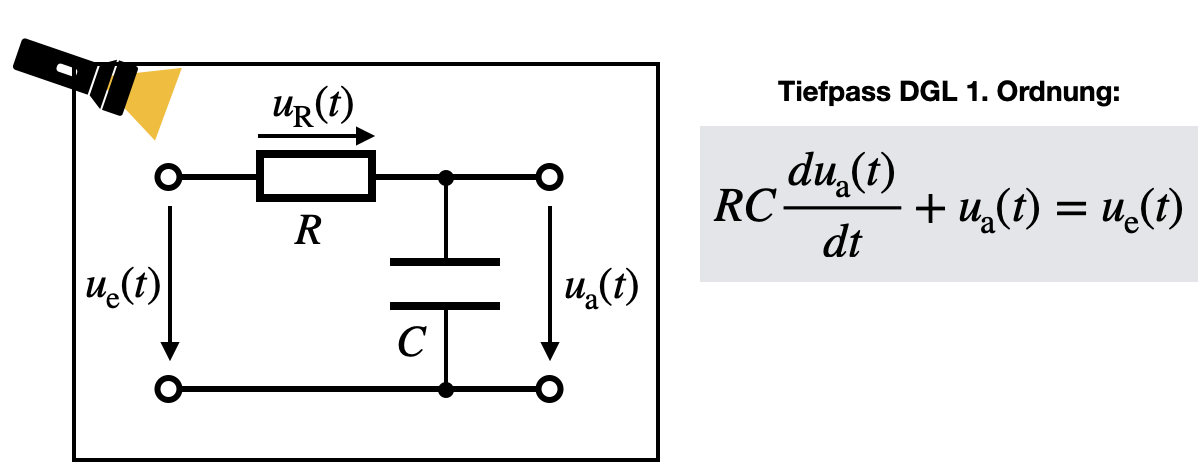

In [4]:
Image("pictures/white_box.png", width=750)

#### Lösen der Differentialgleichung
<a id="SubSubSec-Lösen_der_Differentialgleichung"></a>

Ziel ist es jetzt, eine Funktion für Eingangs- und Ausgangsspannung zu finden, die diese Gleichung erfüllt. Hierfür geht man im Allgemeinen in 5 Schritten vor. Wie werden später in diesem Kapitel noch sehen, dass DGL im Frequenz- bzw. Laplaceraum viel einfacher gelöst werden können als wir es hier, im Zeitraum, jetzt machen.

**1. Homogener Ansatz:**
Unter homogenen Ansatz verstehen wir das Eingangssignal auf Null zu setzen: $u_e(t) = 0$. Das heißt das System wird nicht belastet. Die DGL vereinfacht sich zu

$$RC \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = 0$$

und kann umgeformt werden zu

$$RC \frac{du_\mathrm a (t)}{dt} = -u_\mathrm a (t)$$

Das bedeutet, wird suchen eine Funktion für $u_a(t)$ die nach der Zeit abgeleitet wieder sie selber ist. Eine Exponentialfunktion erfüllt genau diese Bedingung und wir nutzen sie für unseren homogenen Ansatz:

$$u_{a,\mathrm{homogen}}(t) = K \cdot \mathrm e^{-\gamma t} \quad \Rightarrow \quad \dot u_{a,\mathrm{homogen}}(t) = -\gamma K \cdot \mathrm e^{-\gamma t}$$

mit den Konstanten $K$ und $\gamma$. Dies wird in die homogene DGL eingesetzt und es folgt:

$$-RCK\gamma \mathrm e^{-\gamma t} + K \mathrm e^{-\gamma t} = 0 \quad \Rightarrow \quad -RC\gamma + 1 = 0$$

Daraus folgt für die erste Konstante 

$$\gamma = \frac{1}{RC} := \frac{1}{\tau}$$

**2. Spezieller Ansatz für Anfangsbedingung:**
Jetzt legen wir statt Null einen *Sprung* an den Eingang $u_e(t)$ an: $u_e(t) = u_0$ für $t = 0$. Für lange Zeiten wird sich der Kondensator komplett aufgeladen haben, sodass der Ausgang ein konstantes Signal liefert. Das heißt unsere Lösung für ein spezielles Eingangssignal ist

$$u_{a,\mathrm{speziell}}(t) = u_0 \quad \mathrm{für} \quad t \rightarrow \infty$$

**3. Allgemeiner Ansatz:**
Nun kann der allgemeine Ansatz formuliert werden. Diese ist einfach die Addition von homogener und spezieller Ansatz:

$$u_a(t) = u_{a,\mathrm{homogen}}(t) + u_{a,\mathrm{speziell}}(t) = u_0 + K \cdot \mathrm e^{-t/\tau}$$

**4. Konstante bestimmen:**
Eine Konstante war schon bestimmt, nämlich $\gamma = \frac{1}{RC} := \frac{1}{\tau}$. Diese Zeitkonstante wurde bereits in den allgemeinen Ansatz unter 3. eingefügt. Um $K$ zu bestimmen, setzen wir unsere Anfangsbedingung von Schritt 2. ein: Zum Zeitpunkt $t=0$ ist das System zwar am Eingang mit $u_0$ belastet, der Ausgang ist jedoch noch Null, solange der Kondensator nicht vollständig aufgeladen ist. Wir setzen also $t=0$, $u_e(t=0) = u_0$ und $u_a(t = 0) = 0$ in den allgemein Ansatz ein:

$$u_a(0) = u_0 + K \cdot \mathrm e^{-0/\tau}$$
$$0 = u_0 + K \cdot 1 \quad \Rightarrow \quad K = -u_0$$

**5. Lösung hinschreiben:**
Für die Lösung setzen wir alle unsere bestimmten Konstanten in den allgemeinen Ansatz ein und erhalten:

$$u_a(t) = u_0 \left(1- \mathrm e^{-\frac{t}{RC}}\right)$$

Dies ist auch die sogenannte **Sprungantwort** eines Systems 1. Ordnung, da wir in Schritt 2. einen *Sprung* angelegt haben. Hätten wir uns als Eingangssignal einen Impuls (eine Delta-Funktion) ausgesucht, hätten wir die **Impulsantwort** des Systems bestimmt.

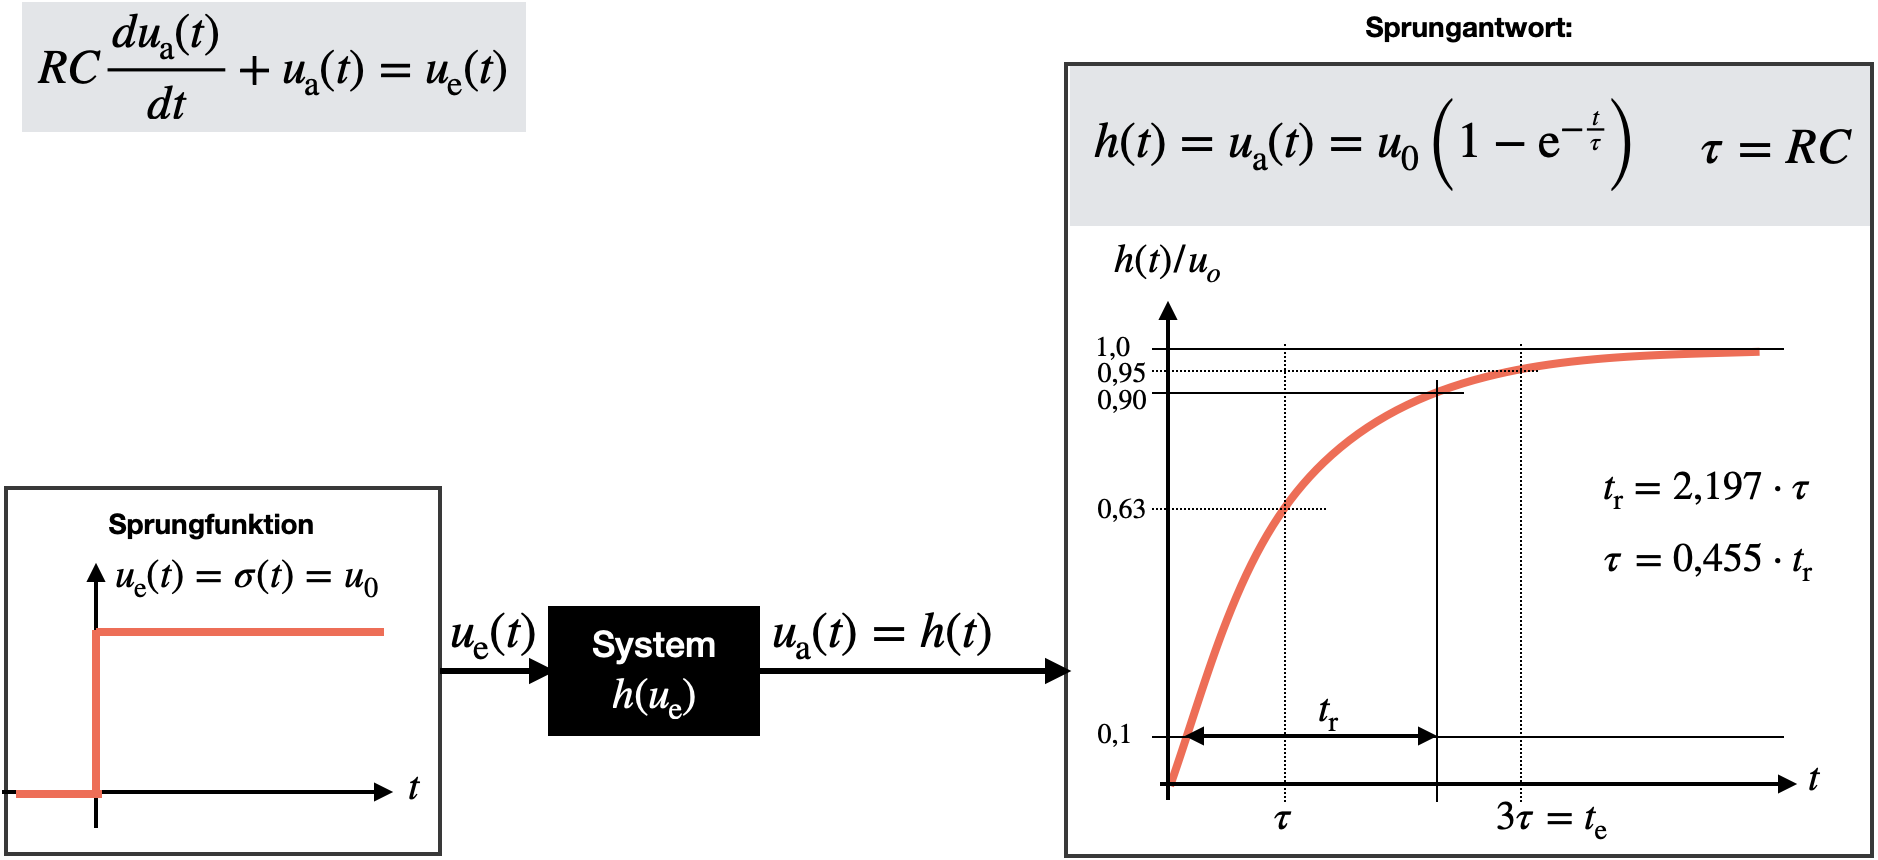

In [5]:
Image("pictures/sprungantwort.png", width=600)

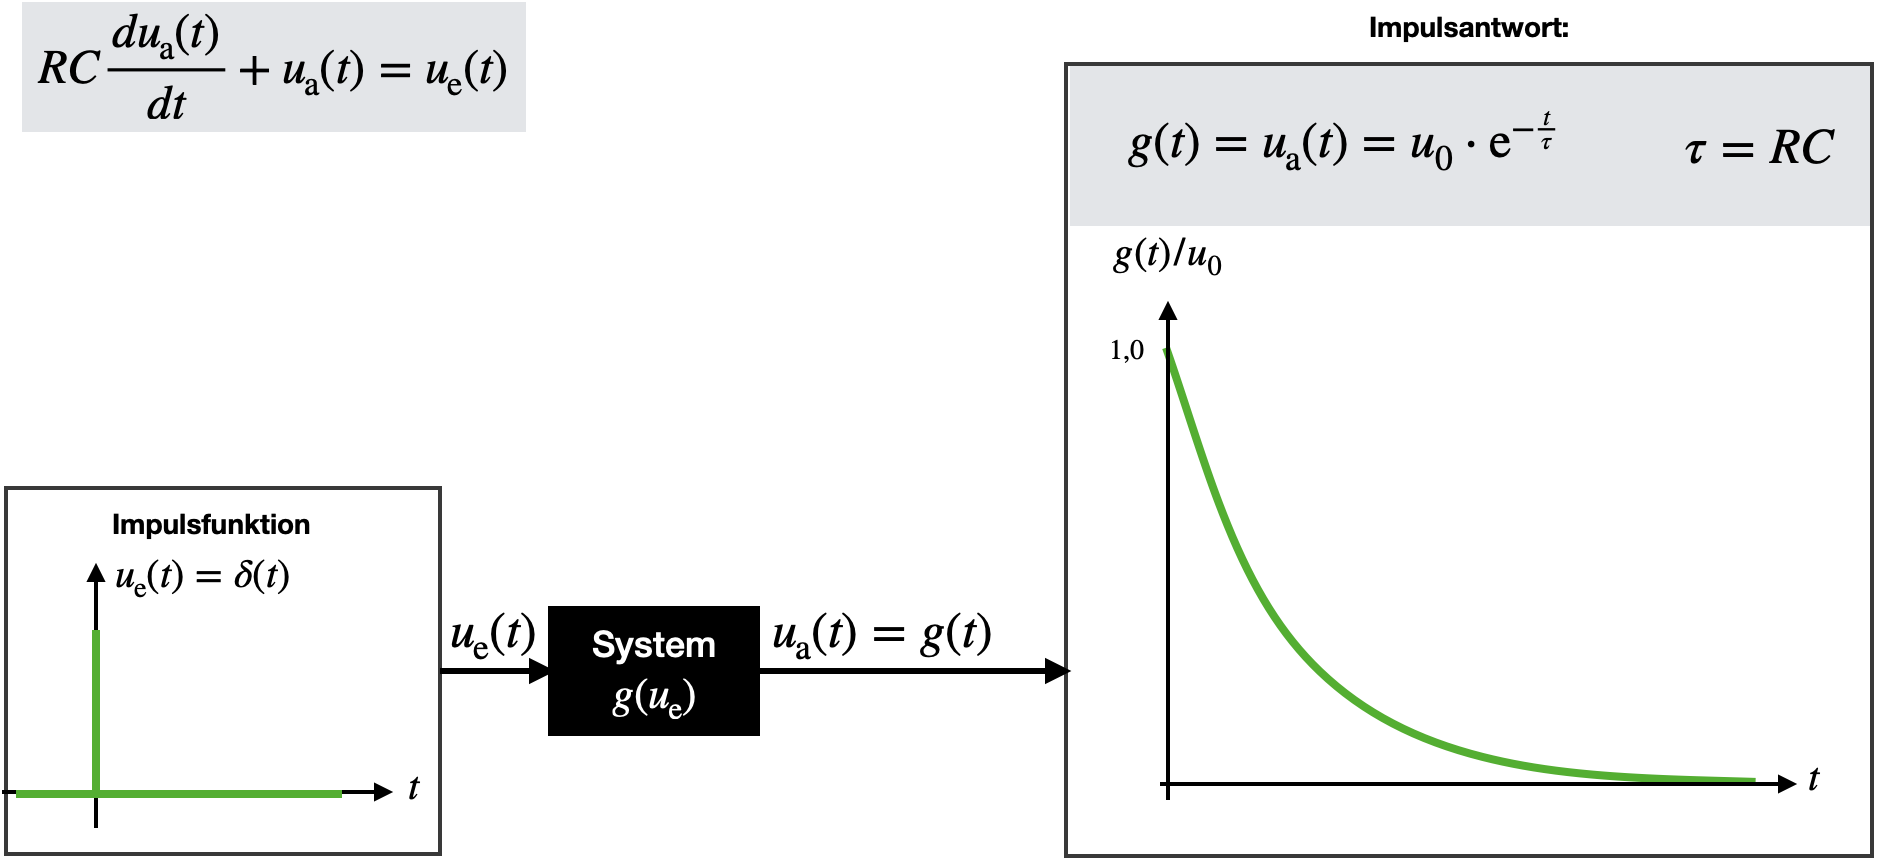

In [6]:
Image("pictures/impulsantwort.png", width=600)

### Black Box
<a id="SubSec-white_box"></a>

Bei dem Prinzip der black box kenne ich das Innenleben meines Messsystems nicht, und ich kann lediglich mittels Messungen darauf zurück schließen. Je nachdem, welches Signal an den Eingang angelegt wird, erhalte ich ein andere Ausgangssignal. Dies ist in den beiden Bildern aus dem vorausgegangenen Kapitel deutlich zu erkenne. In einem Fall wurde ein Sprung angelegt, im anderen Fall ein Impuls. 

In der Messtechnik ist es hingegen häufig viel aussagekräftiger das Übertragungsverhalten einer Messeinrichtung mittels Testfunktionen zu überprüfen. Sprung und Impuls gehören zu des Testfunktionen, doch auch eine Rampenfunktion (ein sich kontinuierlich erhöhendes Eingangssignal) oder ein Sweep (hier werden verschiedene Frequenzen direkt nacheinander durchgefahren) haben sich bewährt. 

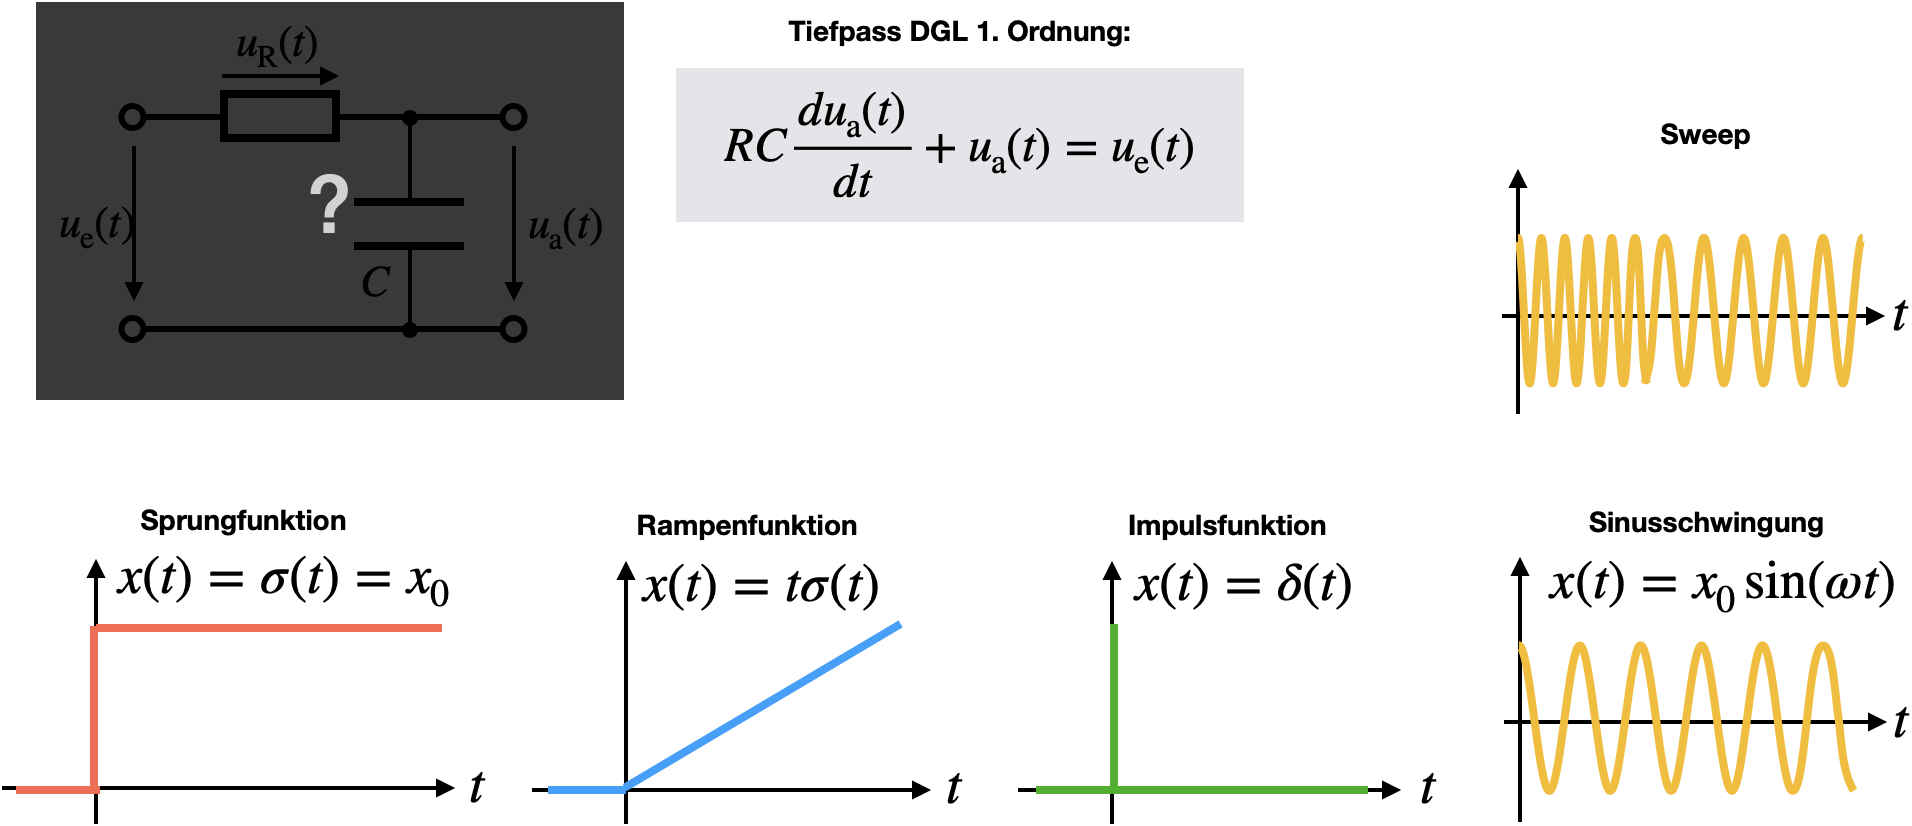

In [7]:
Image("pictures/testfunktionen.png", width=600)

Das Vorgehen ist wiefolgt: Es wird eine Testfunktion angelegt und gemessen. Der Ausgang des Systems wird abgegriffen und ebenfalls gemessen. Ein Vergleich aus angelegtem Eingangssignal und gemessener Systemantwort (Ausgangssignal) können Rückschlüsse für das System getroffen werden. 

#### Interpretation der Sprungantwort
<a id="SubSubSec-Interpretation_der_Sprungantwort"></a>

An dieser Stelle wollen wir uns ansehen, was man aus der Sprungantwort eines Tiefpasses 1. Ordnung im Labor ablesen kann. 
* Geplottet im nachfolgenden Bild ist die normalisierte Sprungantwort, d.h. das Ausgangssignal wurde durch $u_0$ dividiert. Nach langer Einpendelzeit folgt der Ausgang dem Eingangssignal.
* $\tau$ ist die Zeitkonstante, die die *Trägheit* eines Systems bestimmt. 
    * Aus der Theorie ist bekannt (siehe vorheriges Kapitel): $\tau = RC$ 
    * Nach der Zeit $\tau$ ist das Ausgangssignal auf 63% seines maximal möglichen Wertes angestiegen. Es ist noch kein stationärer Zustand erreicht.
* Einstellzeit $t_e$: Dies ist das *95%-Kriterium*:
    * Für ein System 1. Ordnung muss die Sprungantwort $h(t)$ nach der Zeit $t = 3\tau$ 95% des Endwertes erreicht haben.
    * Nur wenn dies der Fall ist, handelt es sich um ein System mit Ausgleich 1. Ordnung
    * Für ein System 2. Ordnung ist häufig ein Überschwingungen oder Einpendeln zubeoachten. Dann ist $t_e$ Zeit vom Anlegen der Sprungfunktion bis zum Erreichen des Toleranzbandes innerhalb von 0,95 und 1,05.
* *Anstiegszeit* $t_r$: Dies ist die Dauer für einen Signalanstieg von 10% auf 90% am Ausgang des Systems.

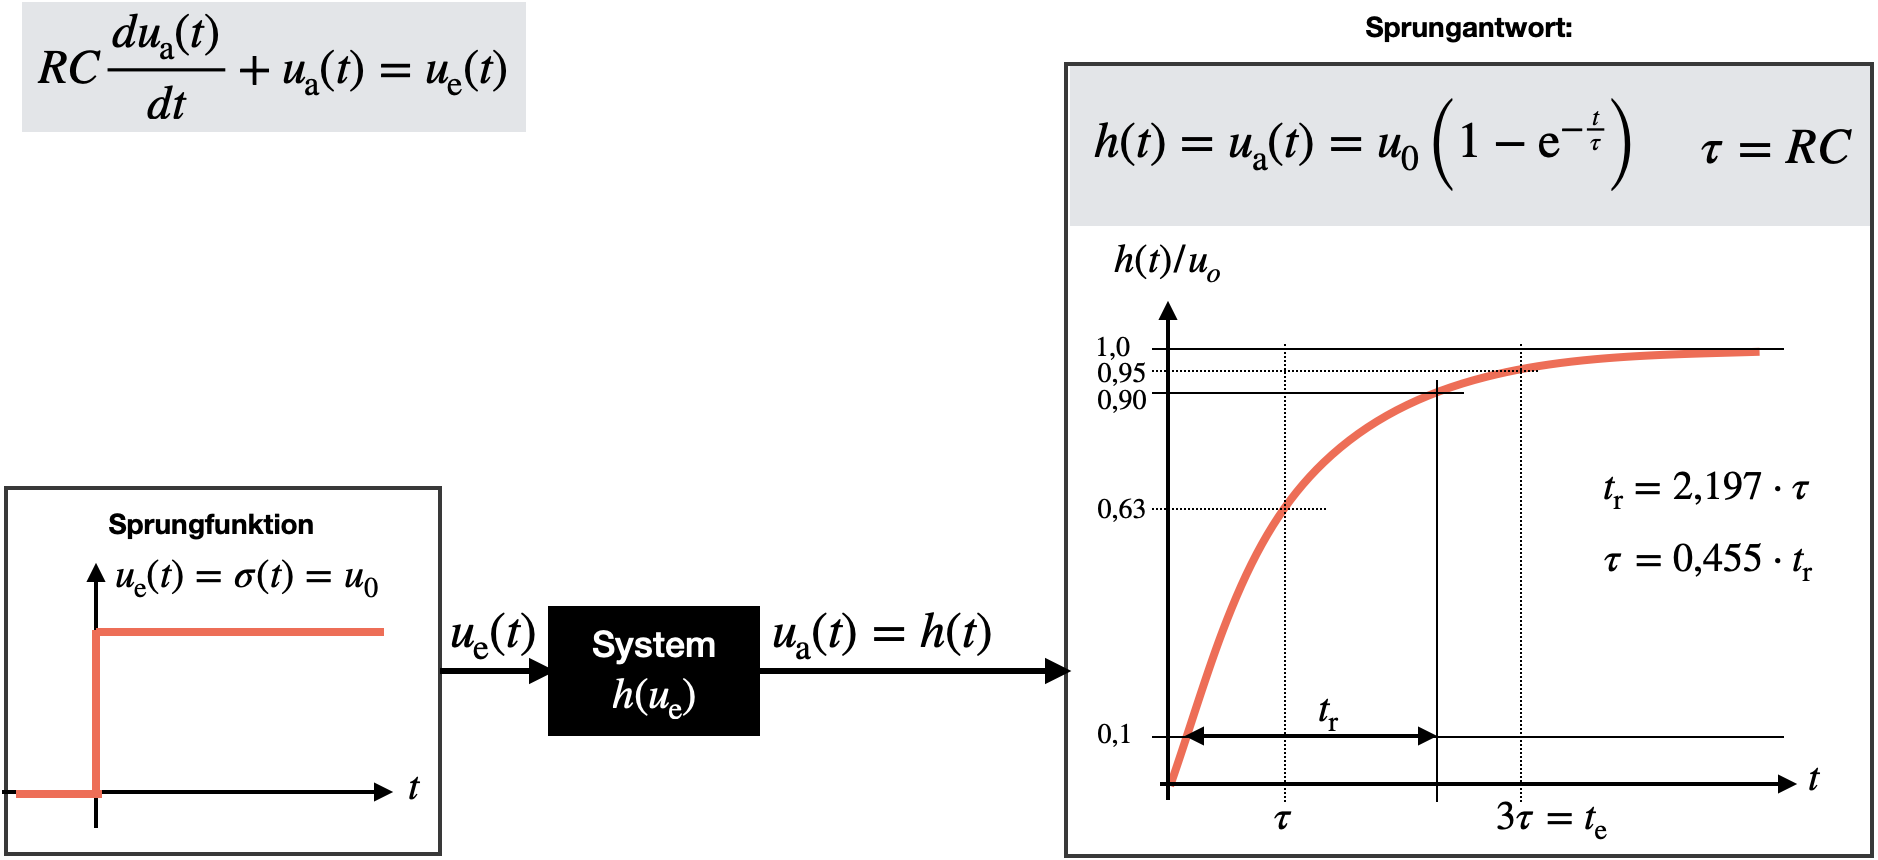

In [8]:
Image("pictures/sprungantwort.png", width=600)

#### Impulsantwort und Faltung im Zeitraum
<a id="SubSubSec-Impulsantwort_und_Faltung"></a>

In diesem Abschnitt wollen wir uns der Genialität der Impulsantwort in Kombination mit der Faltung widmen. 
Hierfür müssen wir uns zuerst angucken, was *Faltung* überhaupt bedeutet. 

Die **Faltung** ist eine mathematische Operation, welche zwischen zwei Funktionen $f$ und $g$ ausgeführt werden kann. Die Kurzschreibweise ist das Sternchen zwischen den beiden Funktionen. Allgemein berechnet wird sie über ein Integral, welches die beiden Funktionen beinhaltet, wobei $g$ hierbei zeitlich gespiegelt und verschoben wird. 

$$(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) \mathrm{d}\tau$$

Die resultierende „Überlagerung“ zwischen $f$ und gespiegelten und verschobenen Versionen von $g$ (man spricht auch von einer „Verschmierung“ von $f$) kann z. B. verwendet werden, um einen gleitenden Durchschnitt zu bilden.
Das Faltungsintegral kann in drei Schritten verstanden werden:

1. der Eingang $g$ wird in der Zeit umgekehrt and zeitverschoben
2. Dieses umgekehrte und verschobene $g$ wird nun an $f$ multipliziert
3. Und dann wird das Produkt über alle Zeiten summiert (Integralbildung).

Für viele Funktionen wurde das Faltungsintegral bereits bestimmt, da es sehr aufwendig ist, dieses i.Allg. zu lösen. 
Das Integral zu lösen hilft außerdem kaum dabei genau zu verstehen, was das Integral, bzw. die Faltung, an sich überhaupt bedeutet. Die Faltung kann auch grafisch bestimmt werden, was wir uns in einer Übung einmal genauer ansehen werden. 

Das interessante der Faltung ist jedoch, dass wir durch diese mathematische Operation das Systemverhalten oder Ausgangssignale vorhersagen können, solange die Impulsantwort bekannt ist. Man kann sich das vereinfacht so vorstellen, dass eine beliebige Eingangsfunktion $f(t)$ durch undendliche viele *Impulse* beschrieben werden, mit infinitesimal kleiner Breite $dt$. Die Impulsantwort ist für einen Impuls (Delta-Peak) bekannt: sie ist die zeitverschobene Antwort $g(t-dt)$. Die Überlagerung vieler einzelner Impulse, eine beliebige Eingangsfunktion $f(t)$ zu modellieren, ist einfach die Aussummerierung aller Impulse. In einem LZI System ist die Impulsantwort ebenfalls die Aufsummerierung der Impulsantworten zu den zugehörigen Impulsen (*Linearitätsbedingung*). 
Um den *realen* Werteverlauf der Eingangsfunktion sicher zu stellen, muss jeder Delta-Peak für jedes Zeitintervall mit dem Funktionswert skaliert werden.
Die *Homogenitätsbedingung* stellt jetzt sicher, dass wir den Ausgang auch entsprechend skalieren dürfen. 
Mathematisch betrachtet resultiert dies direkt darin, dass wir Antworten von beliebigen Anregungsfunktionen hervorsagen können, indem die Anregungsfunktion $f(t)$ mit der Impulsantwort gefaltet wird. 

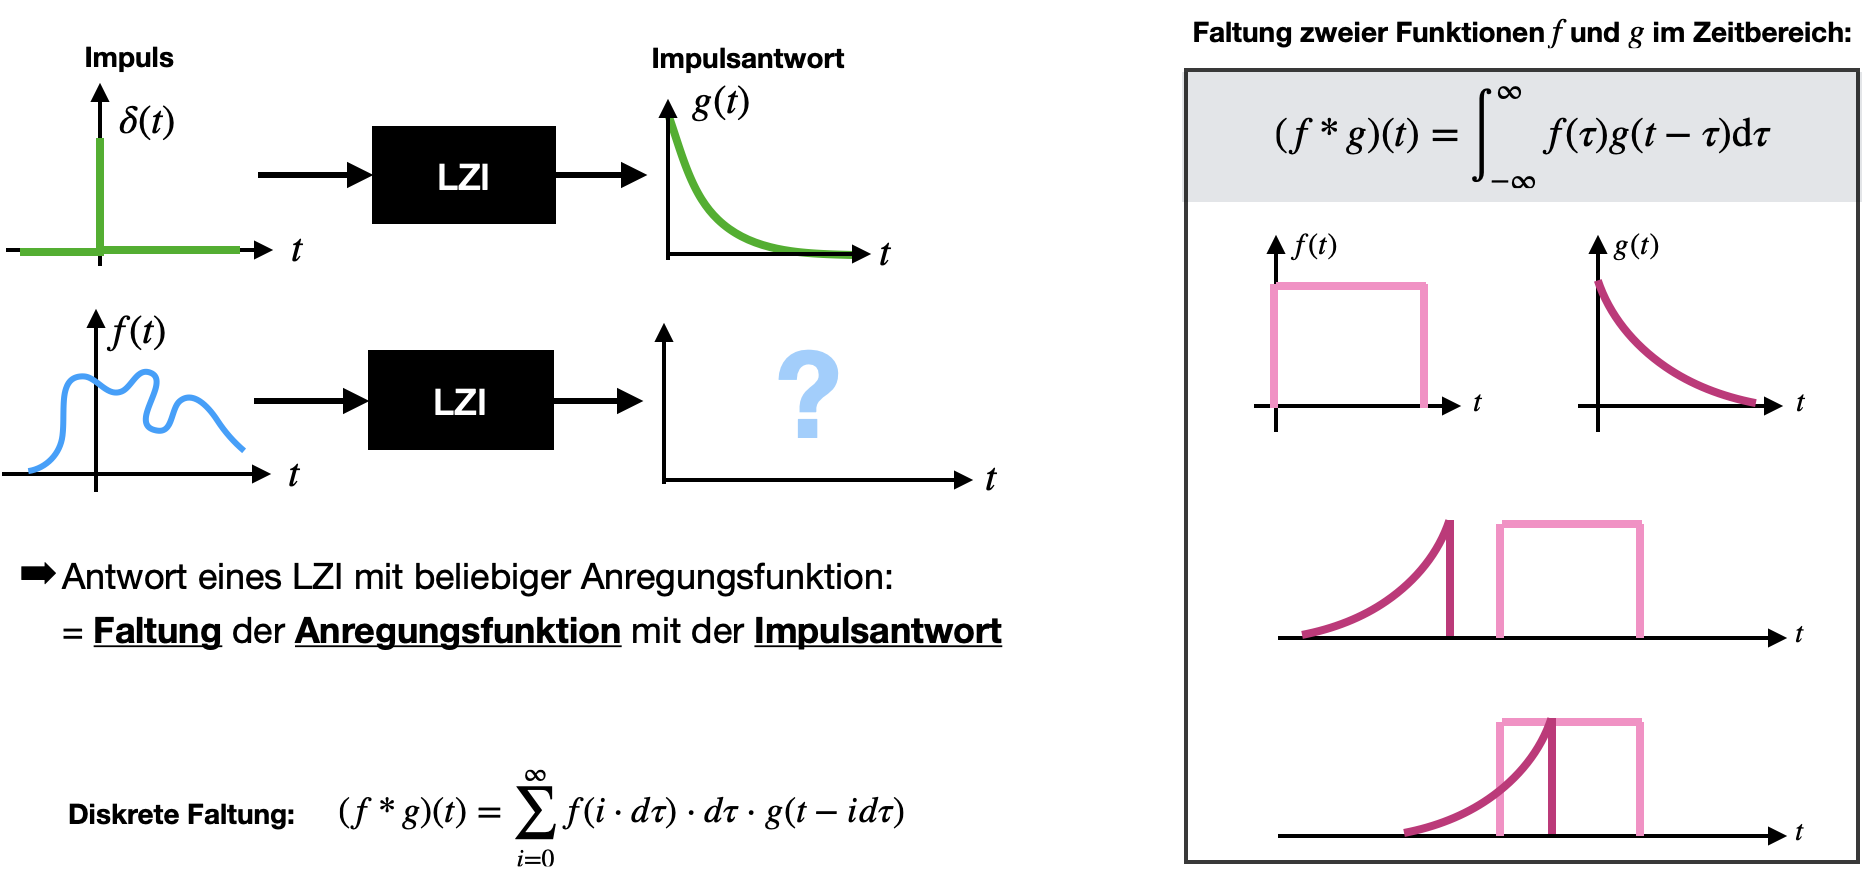

In [9]:
Image("pictures/faltung_zeit.png", width=700)

Die Faltung ist nicht zu verwechseln mit der Kross-Korrelation von zwei Messsignalen. Obwohl die Integrale sehr ähnlich aussehen, so besteht ein signifikanter Unterschied zwischen diesen beiden Methoden, der sich im Minuszeichen der Verzögerung aufzeigt. Grafisch bedeutet dies, dass das zu faltende Signal im Falle der Kreuz-Korrelation *nicht* gespiegelt wird, wohingegen es bei der grafischen Faltung zeitlich gespiegelt werden muss. 
Die *Faltung* berechnet man in der Regel, wenn man die Antwort eines Messsystems berechnen möchte.
$$(f \ast g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) \mathrm{d}\tau$$
Die *Kreuz-Korrelation* berechnet man um zu untersuchen, ob Rauschanteile von Signal $f$ auch in Signal $g$ vorkommen (Stichwort ist hier der *Korrelationsbegriff*, welcher häufig auf zwei *Signale* und nicht Messsysteme angewendet wird).
$$(f \star g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t+\tau) \mathrm{d}\tau$$
Die *Auto-Korrelation* soll hier der vollständigkeitshalber noch einmal als Spezialfall der Kreuz-Korrelation aufgeführt werden. Hier berechnet man, wie ähnlich ein zeit-verschobenes Signal zu sich selbst ist (*zeitliche Korrelation*). 
$$(g \star g)(t) = \int_{-\infty}^{\infty} g(\tau)g(t+\tau) \mathrm{d}\tau$$

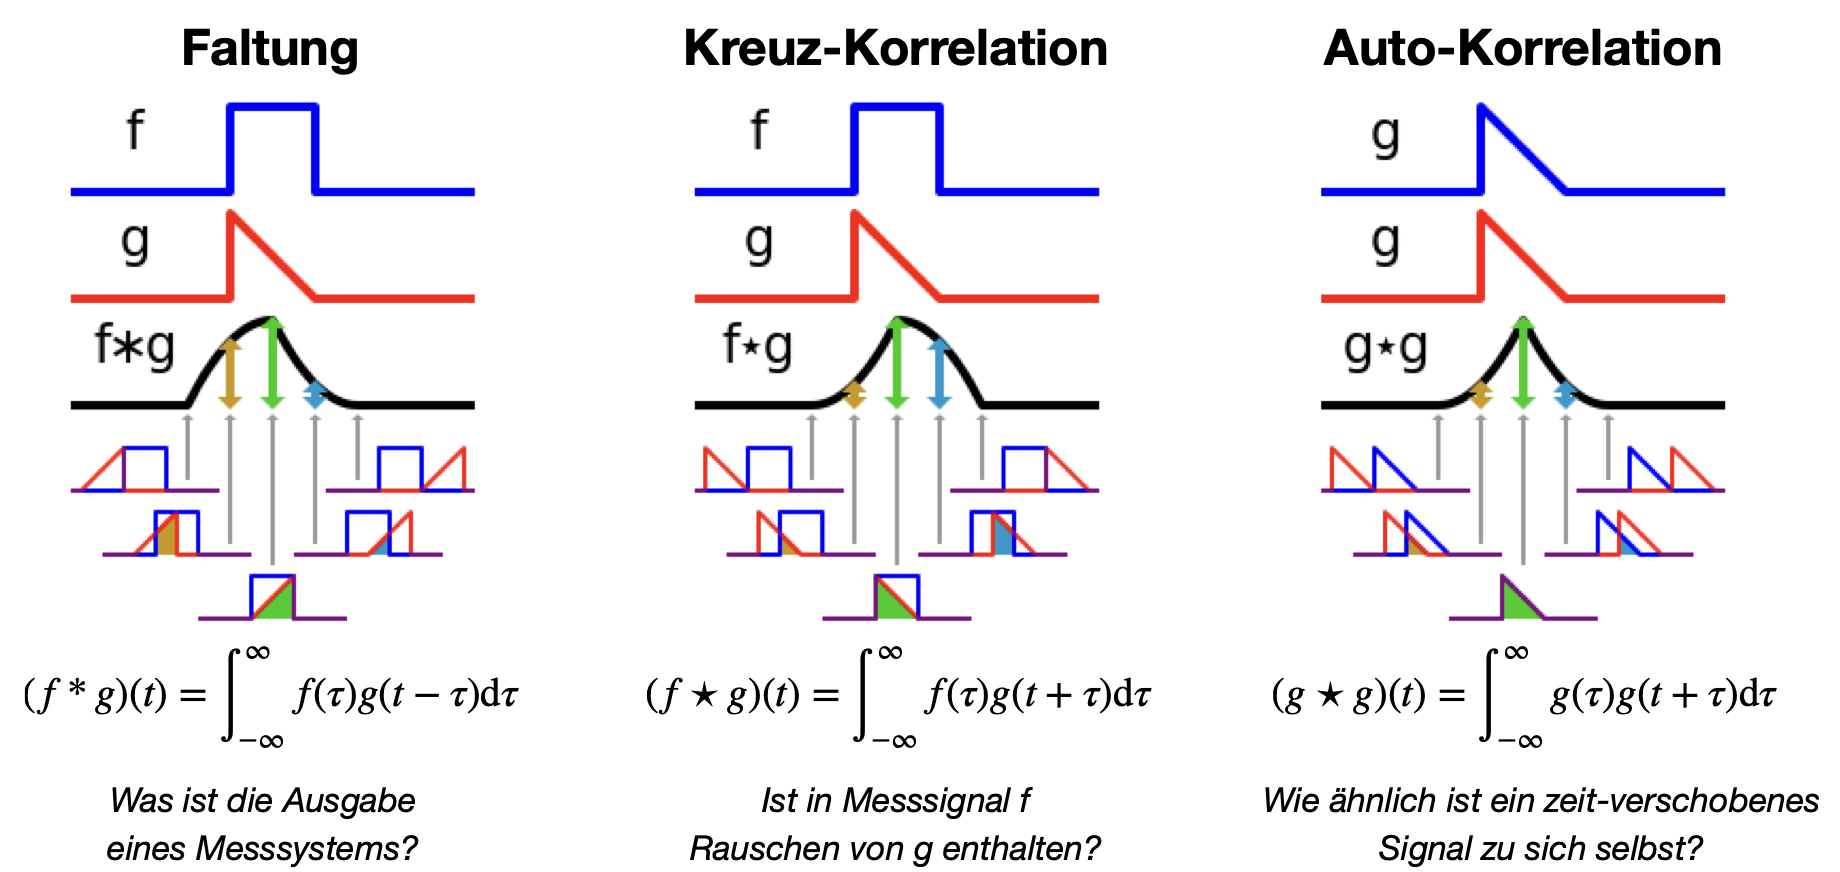

In [10]:
Image("pictures/faltung_kreuzkorr.png", width=700)

## Interpretation im Frequenzraum
<a id="Sec-Interpretation_im_Frequenzraum"></a>

Als nächstes gucken wir uns dynamische Messsysteme im Frequenraum an. 
Aus den letzten Vorlesungen sollte bekannt sein, dass periodische Zeitserien in Fourierreihen umgeschrieben werden können. Nicht-periodische Funktionen können mittels Fourier-Transformation in den Frequenzraum transformiert werden. In beiden Fällen erhält man Auskunft darüber, welche Frequenzanteile in dem Signal vorhanden sind. Die Frequenzanteile weisen eine Amplitude und eine Phase auf und können auch in einem Phasordiagram oder Amplitudendiagram eingezeichnet werden. 

Nicht nur Signale, sondern natürlich auch das Messsystem selber, kann in den Frequenz- oder eher den Laplace-Raum, transformiert werden. Wie sich das Messsystem im Frequenzraum verhält, wird über die sogenannte **Übertragungsfunktion** definiert. Die Übertragungsfunktion eines Systems ist das Verhältnis von Ausgangs- zu Eingangssinal. Das Eingangssignal kann mittels Fourier- oder Laplace-Transformation transformiert werden. Zur Erinnerung schreiben wir hier noch mal die Integrale, die für die Umrechnung benutzt werden:

* Fourier-Transformation: $\mathcal F(x(t)) = X(j\omega) = \int_{-\infty}^{\infty} x(t) \mathrm e^{-j \omega t} dt$
* Laplace-Transformaton: $\mathcal L(x(t)) = X(s) = \int_{0}^{\infty} x(t) \mathrm e^{-st} dt$

Wenn $x(t)$ das Eingangssignal im Zeit-Raum ist, dann bezeichnen wir mit $X(j \omega)$ das Eingangssignal im Frequenzraum. Hier ist $j$ wieder die komplexe Zahl. Das Ausgangssignal $y(t)$ wird analog dazu mit $Y(j \omega)$ bezeichnet. Es hat sich eingebürgert, dass Zeitsignale mit kleinen Buchstaben, $x$, bezeichnet werden und Signale im Frequenzbereich mit großen Buchstaben, $X$. 

Die Übertragungsfunktion, $G(j \omega)$, kann also wiefolgt ausgedrückt werden:

$$G(j \omega) = \frac{Y(j \omega)}{X(j \omega)}$$

### Herleitung der Übertragungsfunktion
<a id="SubSec-übertragungsfunktion"></a>

Anhand unseres Beispiels, dem Tiefpass 1. Ordnung, wollen wir die Übertragungsfunktion einmal herleiten. Dazu gibt es verschiedene Ansätze. 

**1. Methode:** Eine Möglichkeit die Übertragungsfunktion zu bestimmen, ist es die DGL aus dem vorherigen Kapitel in den Frequenzraum zu transformieren. Die DGL des Tiefpasses 1. Ordnung war gegeben durch:

$$\tau \frac{du_\mathrm a (t)}{dt} + u_\mathrm a (t) = u_\mathrm e (t)$$

* Transformiere die Signale in den Frequenzraum. Der letzte Punkt resultiert aus den Eigenschaften von Fourier-Transformationen für zeitliche Ableitungen von Zeitsignalen.
    * $u_\mathrm e (t) \rightarrow U_e(j \omega)$
    * $u_\mathrm a (t) \rightarrow U_a(j \omega)$
    * $\dot u_\mathrm a (t) \rightarrow j \omega U_a(j \omega)$
* In der DGL werden die Zeitsignale durch die Fourier-Transformierten ersetzt:

$$\tau j \omega U_\mathrm a(j \omega) + U_\mathrm a (j \omega) = U_\mathrm e (j \omega)$$

* Die DGL wird nach $U_\mathrm a(j \omega) / U_\mathrm e(j \omega)$ umgestellt, um die Übertragungsfunktion zu erhalten.

$$G(j \omega) = \frac{U_\mathrm a(j \omega)}{U_\mathrm e(j \omega)} = \frac{1}{1+\tau j \omega}$$

**2. Methode:** Sollte die DGL (noch) nicht bekannt sein, kann die Übertragungsfunktion auch direkt über die komplexen Widerstände bestimmt werden. Bei dem Tiefpass 1. Ordnung handelt es sich um die Reihenschaltung von Widerstand und Kondensator. 

* Die komplexe Ausgangsspannung wird über dem Kondensator abgegriffen, das heißt es gilt das ohm'sche Gesetz für komplexe Zahlen. $\underline Z_C = \frac{1}{j\omega C}$ ist die Impedanz des Kondensators mit Kapazität $C$ und $\underline I$ der Strom. 

$$\underline U_\mathrm a = \underline Z_C \cdot \underline I$$

* Die komplexe Eingangsspannung liegt an kompletten Messsystem, also der Reihenschaltung an, d.h. es gilt

$$\underline U_\mathrm a = (R+ \underline Z_C) \cdot \underline I$$

* Die Division der beiden Spannungen führt abermals zur der gesuchten Übertragungsfunktion:

$$G(j \omega) = \frac{\underline U_\mathrm a}{\underline U_\mathrm e} = \frac{1/(j\omega C)}{R + 1/(j\omega C} = \frac{1}{1+RC j \omega}$$

* Die Zeitkonstante $\tau = RC$ könnte nun noch in die Gleichung eingesetzt werden.

### Interpretation der Übertragungsfunktion: Bode Diagramm
<a id="SubSec-bode"></a>

Nachdem wir nun die Übertragungsfunktion hergeleitet haben, wollen wir wissen, was wir aus dieser Funktion ableiten, bzw. von ihr lernen können. Zunächst einmal sehen wir, dass es sich um eine komplexe Zahl handelt. Wir für jede andere komplexe Zahl können wir also hier Amplitude und Phase bestimmen. Dazu formen wir $G$ in die typische Schreibe einer komplexen Zahl um, sodass Real- ($\mathrm{Re}$) und Imaginärteil ($\mathrm{Im}$) direkt abgelesen werden können. Hierfür erweitern wir $G$ typischer mit dem komplex Konjugierten:

$$G(j \omega) = \frac{1}{1+RC j \omega} = \frac{1}{1+RC j \omega} \cdot \frac{1-RC j \omega}{1-RC j \omega} = \frac{1-RC j \omega}{1- (RC \omega)^2} = \frac{1}{1- (RC \omega)^2} - j\frac{ RC \omega}{1- (RC \omega)^2}$$

* Die Amplitude wird wiefolgt berechnet, wobei $\tau = RC =: 1/\omega_0$

$$G(\omega) = \sqrt{\mathrm{Re}^2 + \mathrm{Im}^2} = \frac{1}{\sqrt{1+\left(\frac{\omega}{\omega_0}\right)^2}}$$


* Die Phase wird wiefolgt berechnet, wobei $\tau = RC =: 1/\omega_0$

$$\phi(\omega) = \arctan\left(\frac{\mathrm{Im}}{\mathrm{Re}}\right) = \arctan\left(-\frac{\omega}{\omega_0}\right)$$

Sowohl Amplitude als auch Phase hängen von der Frequenz $\omega$ des eingehenden Signals ab! Daher nennt man die Fuktionen für Amplitude und Phase auch **Amplitudengang** bzw. **Phasengang**. Beide zusammengenommen bilden den **Frequenzgang** eines Systems und werden häufig zusammen geplottet, im sogenannten **Bode-Diagramm**. Eine solche Darstellung ist im folgenden Bild gezeigt: 

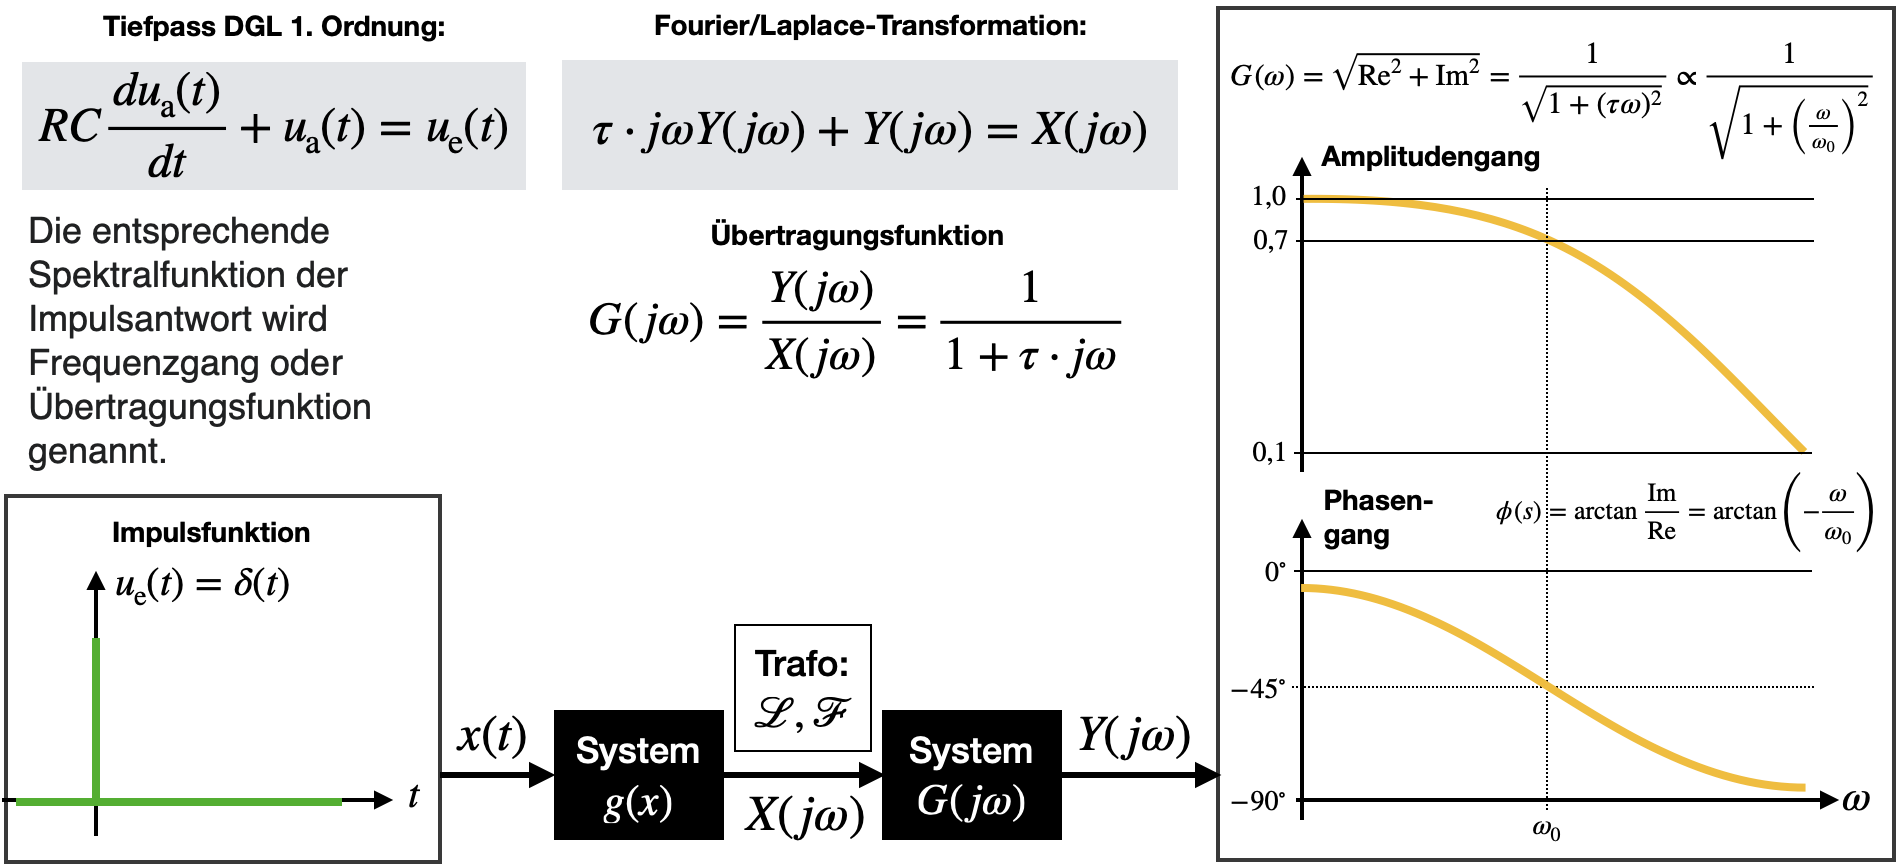

In [11]:
Image("pictures/bode_diagram.png", width=700)

Auch hier kann man, wie schon bei der Interpretation der Sprungantwort, Kenngrößen ablesen. 
Bei der **Grenzfrequenz** $\omega_0 = 1/\tau$ fällt die Amplitude auf $1/\sqrt{2} = 0,707 = -3\,\mathrm{dB}$ ab. Häufig werden Systeme anhand der Greqenzfrequenz charakterisiert. Man sollte aber nicht vergessen, dass bei Signalen mit diesen Frequenzanteilen bereits signifikante Verluste in Höhe von 29% zu erwarten sind, die eigentlich nicht tolerierbar sind. Je höher die Frequenz, desto höher die Verluste (bei dem hier dargestellten Tiefpassfilter!). Das heißt der Fehler, der bei einer Messung gemacht wird, ist frequenzabhängig!

In der Akustik kann man damit leben, kann man kaum hören den Unterschied
In der Messtechnik bei der Überwachung von schwingenden Maschinenteilen oder der Ermittlung von Rundlaufabweichungen von drehenden Wellen ist solch ein Ampitudenabfall meist nicht zu akzeptieren.
Üblicherweise sollte man andere Grenzfrequenzen separat angeben, die 90% oder 99% der Signalstärke durchlassen. 

Sind die zeitbestimmenden Glieder (R und C) des Tiefpasses bestimmt, können wir daraus die Greqnzfrequenz bestimmen und somit den Verlust abschätzen. 

Im Folgenden Bild grafisch dargestellt, wie verschiedene Signale durch einen Tiefpass verfälscht werden können, in dem hohe Frequenzanteile abgeschwächt werden. Auch hier erkennt man wieder einen Zusammenhang zu den Fourierreihen, wenn man sich das Rechtecksignal ansieht. Eine Reihe von Rechteckpulsen benötigt eine hohe Anzahl von Sinusfunktionen bei höheren harmonischen der Grundfrequenz, um möglichst steile Flankenübergänge zu erhalten. Eine Filterung dieser hohen Frequenzanteile sorgt für eine deutliche Verzerrung des Signals. Bei sinusförmirgen Signalen hingegen wird nur die Amplitude abgeschwächt und es findet zusätzlich, je nach Frequenz, eine zeitlich Verzögerung statt, d.h. die Signale sind phasenverschoben um bis zu -90°. 

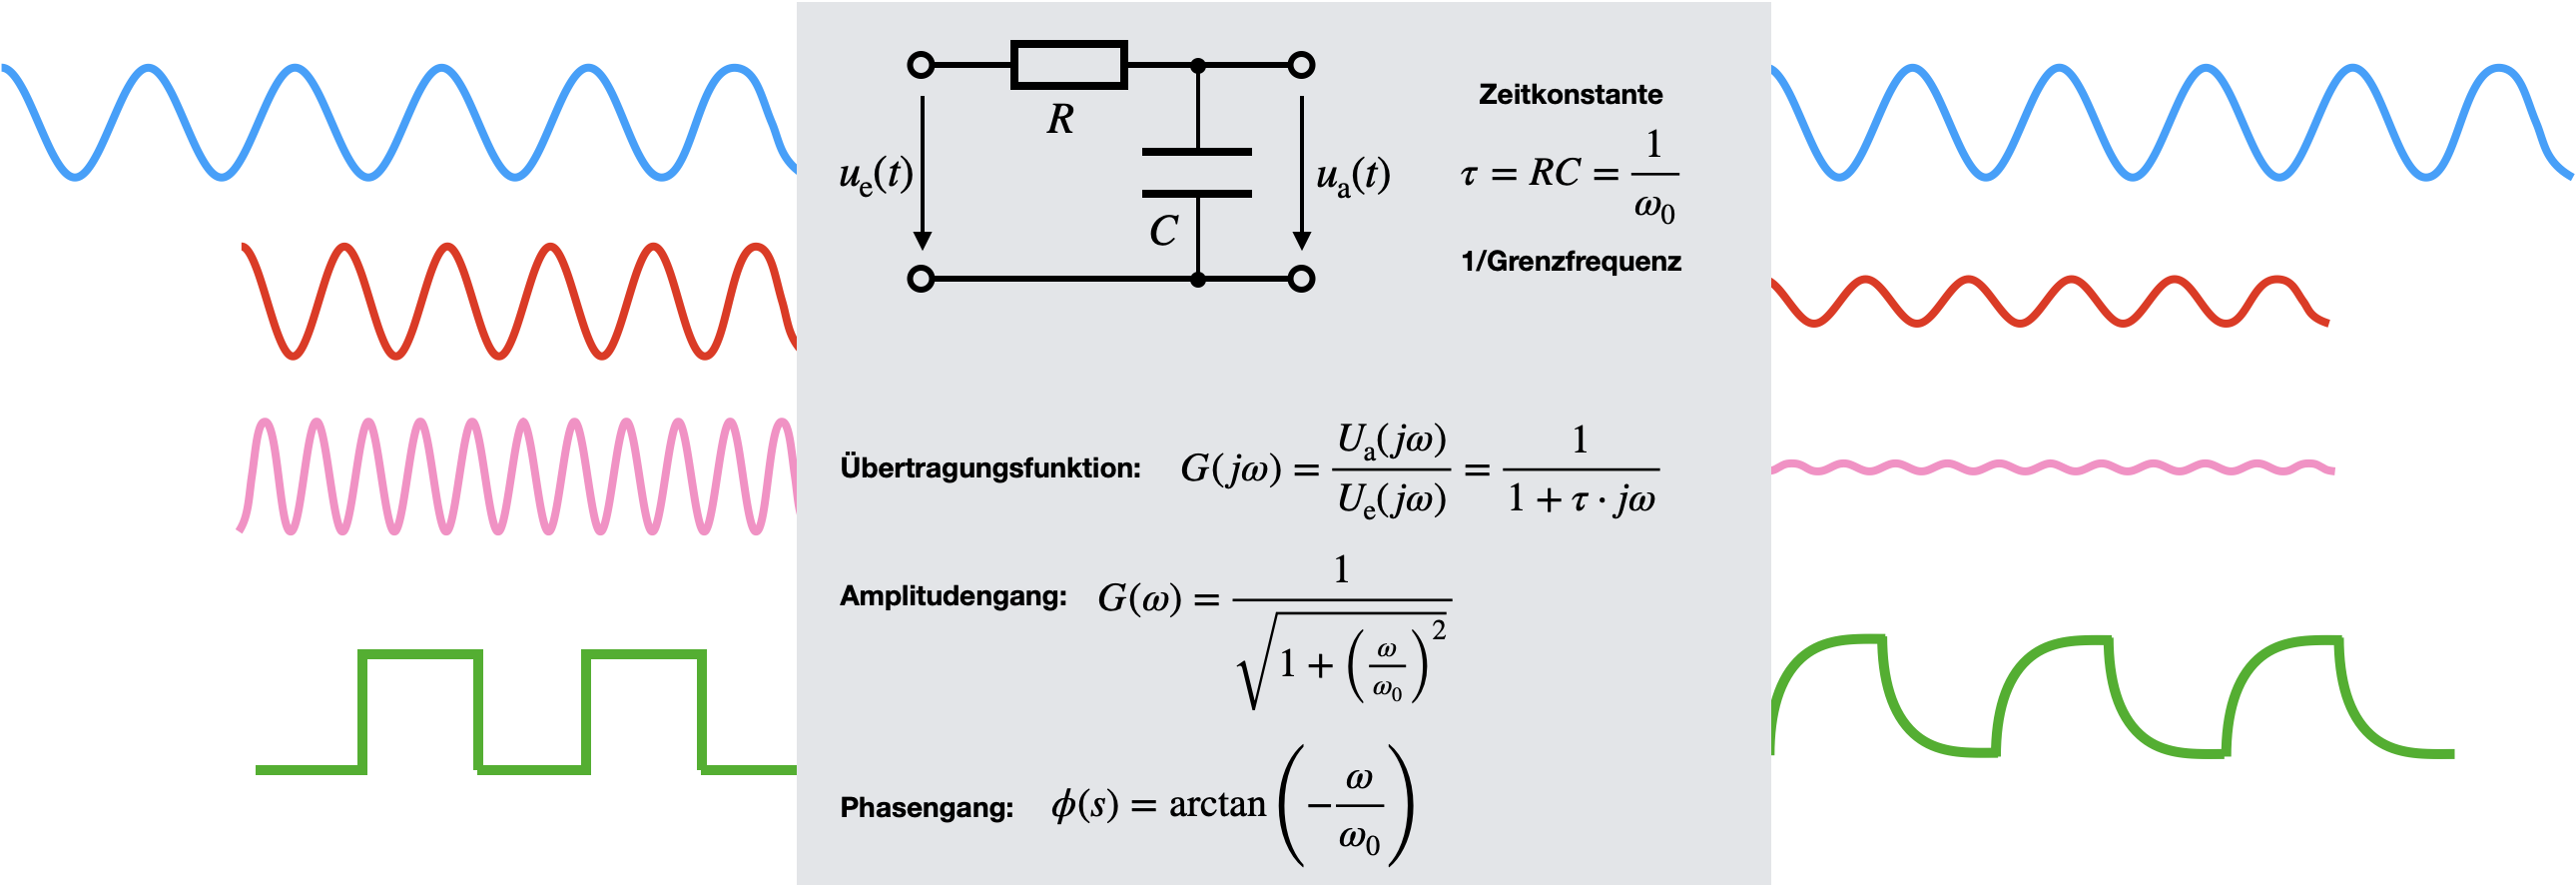

In [12]:
Image("pictures/TP_zusammenfassung.png", width=700)

### Kombination von Übertragungsfunktionen: Faltung im Frequenzraum
<a id="SubSec-kombi_bandpass"></a>

Auch das hintereinanderschalten von Messsystemen ist im Frequenzraum viel einfacher zu berechnen als im Zeitraum. Eine Hintereinanderschaltung bedeutet allgemein nichts anderes, als die Faltung von Übertragungsfunktionen der jeweiligen Messsysteme. Im Zeitbereich müsste man hierzu das Faltungsintegral lösen. Im Frequenzraum ist die Faltung lediglich eine Multiplikation der Übertragungsfunktionen. 

Als Beispiel soll uns ein Bandpass dienen, der aus der Hintereinanderschaltung eines Hoch- und Tiefpasses realisiert werden kann. Im Folgenden Bild sind die Komponenten des Tiefpasses (TP) blau dargestellt, die des Hochpasses (HP) rot dargestellt. Der Tiefpass lässt tiefe Frequenzen bis zu seiner Grenzfrequenz passieren (bis auf die 71% Signalverlust) und der Hoch lässt hohe Frequenzen bis zu seiner Grenzfrequenz passieren. Wir wählen C und R der beiden elektronischen Schaltungen so, dass die Grenzfrequenz der Hochpasses unterhalb der des Tiefpasses liegt, also $f_\mathrm HP < f_\mathrm{TP}$. Der Amplitudengang ist rechts im folgenden Bild geplottet:

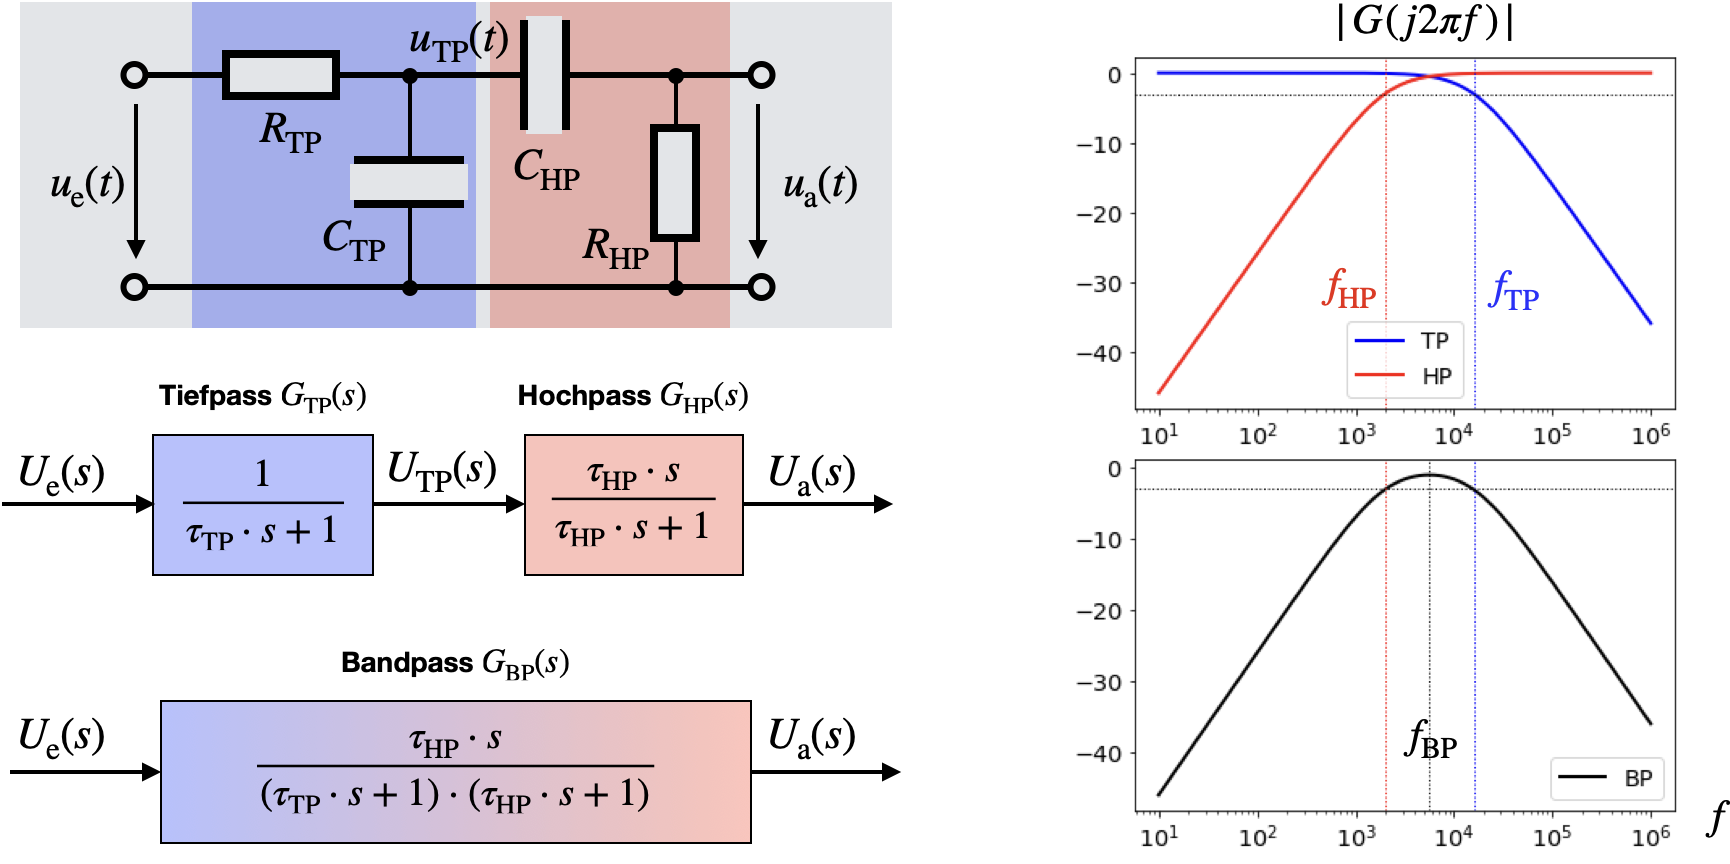

In [13]:
Image("pictures/bandpass.png", width=700)

Wie eben schon beschrieben, können im Zeitraum die Übertragungsfunktionen der Einzel-Systeme (hier also Hochpass und Tiefpass) einfach multipliziert werden und man erhält die kombinierte Übertragungsfunktion des resultierenden Bandpasses. Wird die Übertragungsfunktionen in Einheiten von dB gezeichnet, also logarithmisch aufgetragen, so ergibt sich eine weitere grafische Vereinfachung bei der Kombination: In logarithmischen Einheiten können die einzelnen Übertragungsfunktionen in einem Amplitudengangs-Plot addiert (!) statt multipliziert werden. 

### Anlegen von Testfunktionen
<a id="SubSec-freq_test"></a>

Nicht nur im Zeitraum können Sprünge oder Impulse angelegt werden. Für diese Testfunktionen können auch die Laplace, bzw. Fourier-Transformierten berechnet werden. Auch dies ist im Frequenzraum häufig einfacher, da die Testfunktionen, wie es in der Tabelle im folgenden Bild zu erkennen ist, sehr einfach sind. 

Um das Verhalten unseres eben diskutierten Bandpasses auf verschiedene Eingangssignale zu untersuchen, können wir die gleichung der Übertragungsfunktion einfach nach $U_\mathrm a$ auflösen. Das liefert uns im allgemeinen Fall eine Gleichung für das zu erwartende Ausgangssignal:

$$U_\mathrm a = G(s) \cdot U_\mathrm e(s)$$

Wählen wir als Eingangssignal einen Dirac-Puls, $\delta(t)$, um die Impulsantwort zu berechnen, so erhalten wir diese in dem wir für $U_\mathrm e(s) = 1$. Dies ist einfach die Laplace-Transformierte eines Delta-Peaks. 

Wählen wir als Eingangssignal einen Sprung, möchten also die Sprungantwort bestimmen, so setzen wir in die Gleichung $U_\mathrm e(s) = 1/s$, die Laplace-Transformierte einer Sprungfunktion. 

Auch hierbei handelt es sich wieder um Faltungen im Frequenzraum, deren Berechnungen im Zeitbereich sehr viel komplizierter wären. 

aus Übertragungsfunktionen können noch weitere Eigenschaften von Messsystemen abgeleitet werden, auf die wir hier nicht näher eingehen können. Aus den Nullstellen und Polstellen kann aber abgelesen werden, ob das System stabil ist, sprungfähig ist oder eher ein integrales Verhalten aufweist. 

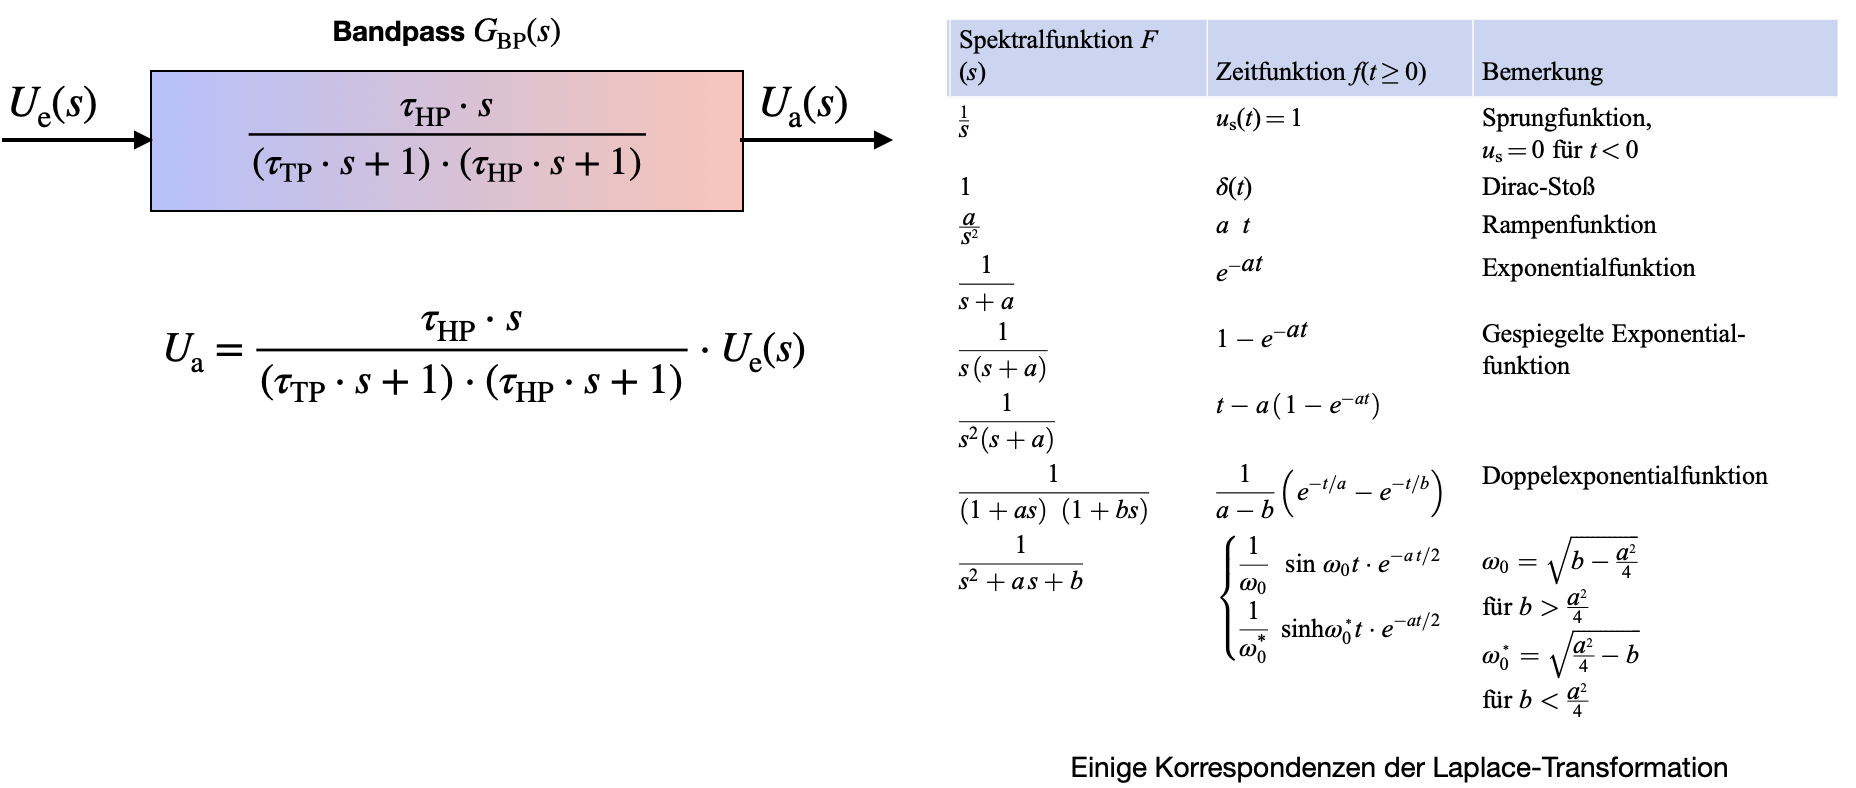

In [14]:
Image("pictures/bandpass_laplace.png", width=700)

### Verhalten von Systemen 2. Ordnung
<a id="SubSec-2ndorder_freq"></a>

Der Vollständigkeitshalber wollen wir uns noch ganz kurz die Bode-Diagramme von Systemen 2. Ordnung ansehen. Auf eine mathematische Beschreibung wollen wir an dieser Stelle aber verzichten. 

Bei Systemen 1. Ordnung handelt es sich um Systeme mit Energiespeicher, also alle Systeme die irgendwie warm werden. Bei Systemen 2. Ordnung hat man zwei gekoppelte Energiespeicher, die Energie unter Umständen periodisch austauschen können. Hier findet man dann immer einen zusätzlichen Term in der DGL der die Dämpfung des Systems beschreibt. 

Um ein System 1. Ordnung von einem System 2. Ordnung zu unterscheiden, kann man sich das Bode-Diagramm (links im nachfolgenden Bild) ansehen. Bei Systemen 1. Ordnung fällt die Amplitude innerhalb einer Frequenzdekade (also ein Faktor 10) um -20 dB ab, bei Systemen 2. Ordnung  um -40 dB (*Übung: Warum?*). Auch die zeitliche Verzögerung, also die Phase des Eingangssignals, erfährt ebenfalls einen steileren Abfall.  

Rechts im Bild ist das Zeitliche Verhalten einer Sprungantwort dargestellt. Je nach Dämpfung erhält man ein Überschwingen, ein langsames Annähern (aperiodische Einstellung in b)) oder sogar ein oszillierendes Verhalten (schwingende Einstellung in a)) des Ausgangssignals um das Endsignal. Aufgrund dieser Dynamik entstehen Fehler und es ist ratsam eine gewisse Zeit zu warten, bis der Endwert auch hier ein 1% Toleranzband erreicht, ähnlich wie bei Systemen 1. Ordnung. Hieraus kann man außerdem schlussfolgern, dass man in der Tat immer eine gewisse Dämpfung haben möchte, damit die Oszillationen frühzeitig abklingen. Eine zu hohe Dämpfung verursacht jedoch lange Wartezeiten, bis das Ausgangssignal sich dem endgültigem Wert endlich angenähert hat. 

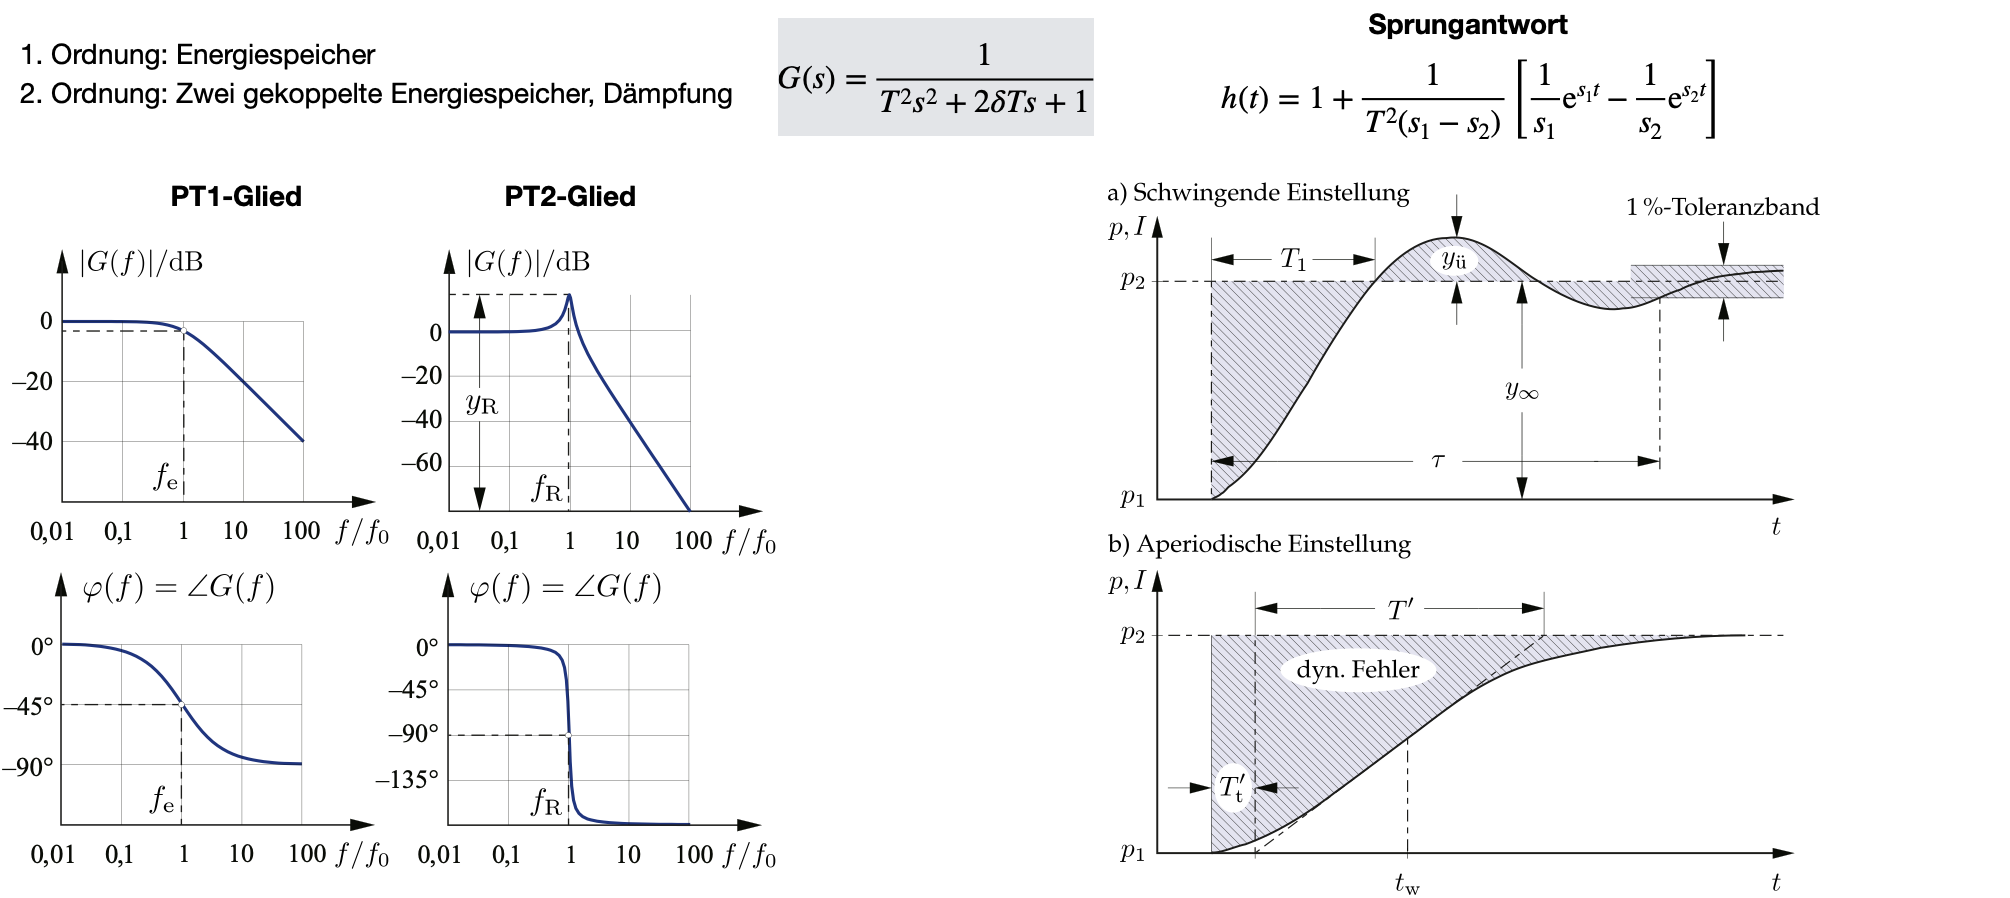

In [15]:
Image("pictures/TP_2ndorder.png", width=700)

Einige Beispiele zu Systemen mit Verzögerungs, Dämpfungs bzw. auch integrierendem Verhalten sind in nachfolgender Tabelle dargestellt. In der Literatur findet man häufig diese tabellarischen Zusammenfassungen verschiedener Messsysteme inklusive Übertragungsfunktion und Bode-Diagramm, damit die DGL nicht jedes mal neu hergeleitet werden müssen. Die Hintereinanderschaltung einzelner Komponenten kann auch hier wieder ganz einfach im logarithmischen Bode-Diagramm per Addition der Übertragungsfunktionen abgeschätzt werden. 

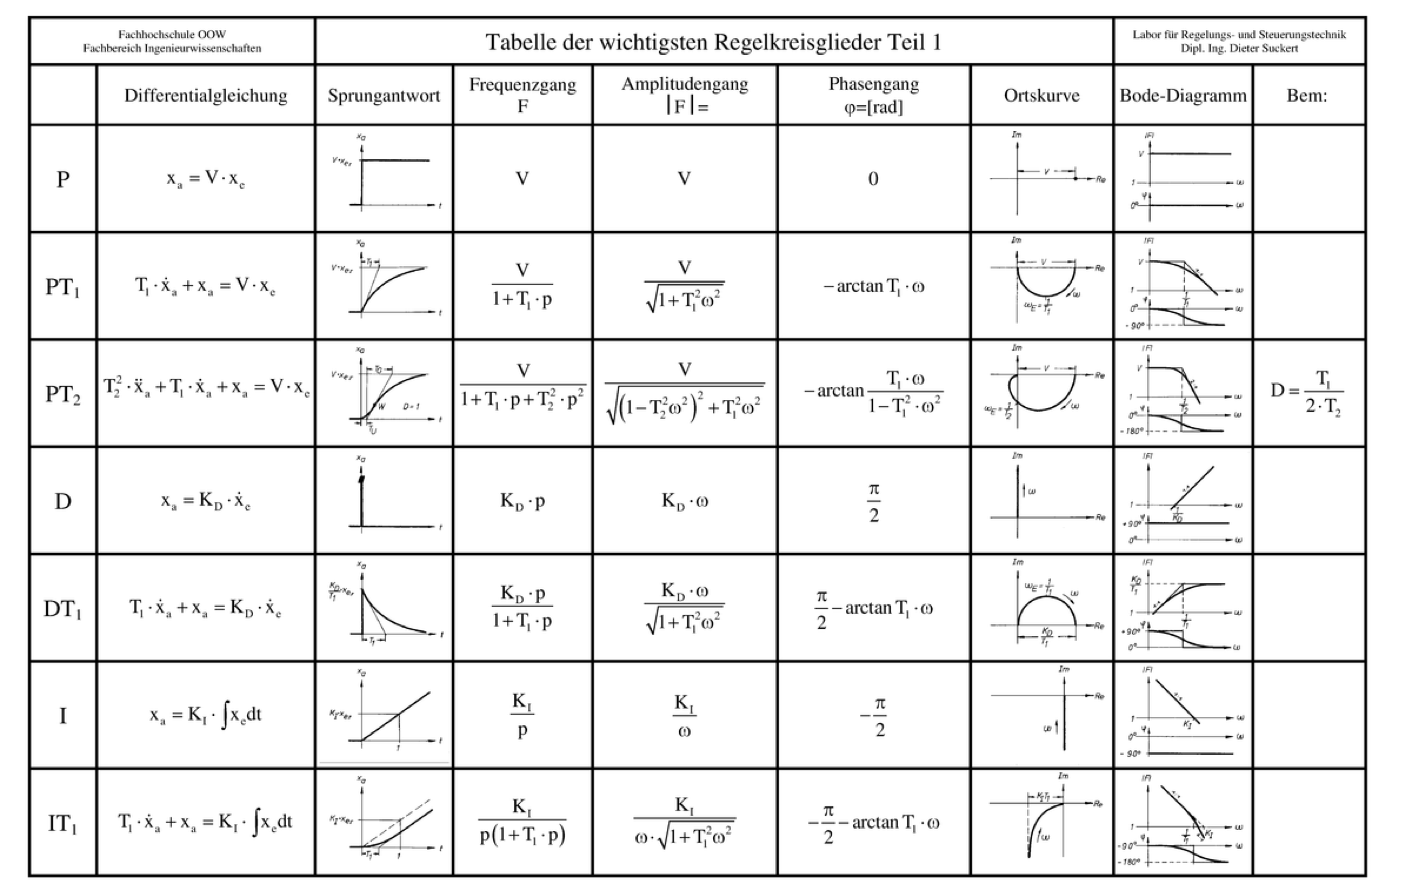

In [16]:
Image("pictures/wichtigste_regelkreisglieder.png", width=700)

## Zusammenfassung
<a id="Sec-Zusammenfassung"></a>

Bevor wir zu der Zusammenfassung kommen, soll im folgenden Bild noch einmal dargestellt werden, welche Trick und Tips man sich im Frequenzraum noch von Nutzen machen kann, solange es sich um ein LZI System handelt!

* Mittels Fourier-Transformation kann ich jederzeit in den Frequenzraum wechseln und mittels Rücktransformation zu gehen. Egal ob es sich um ein Signal oder ein System (hier wird häufig der Laplace-Raum verwendet) handelt.
* Die Ableitung der Sprunganregung ist eine Dirca-Funktion (Impulsanregung). Die Ableitung der Sprung*antwort* ergibt die Impuls*antwort*. Die gilt sowohl im Zeit- wie auch im Frequenzraum. (*Frage: Was sieht die zeitliche Ableitung der Fourier-Transformierten 1/s?)
* Lösen von DGLs im Laplace-Raum ist eine algebraische Umformung der Gleichung
* Lösen von DGLs im Zeitraum benötigt einen Lösungsansatz, eine homogene Lösung, eine spezielle Lösung und verschiedene Schritte inkl. Anfangsbedingungen um die Lösung zu finden.
* Die Faltung im Laplace-Raum ist eine Multiplkation
* Die Faltung im Zeitraum ist ein Integral
* Die Faltung ist generell ein hilfreiches Werkzeug um...
    * Systeme hintereinanderzuschalten und die Gesamt-Übertragungsfunktion zu berechnen (Faltung der beiden Systeme berechnen)
    * Die Antwort auf ein beliebiges Eingangssignal mittels Impulsantwort zu bestimmten (Faltung von beliebigem Eingangssignal mit Impulsantwort liefert Antwort des Systems auf das beliebige Eingangssignal)
    * Die Faltung hilft bei allen drei Problemen: System-Indentifizierungsproblem, Simulationsproblem und Kontrollproblem

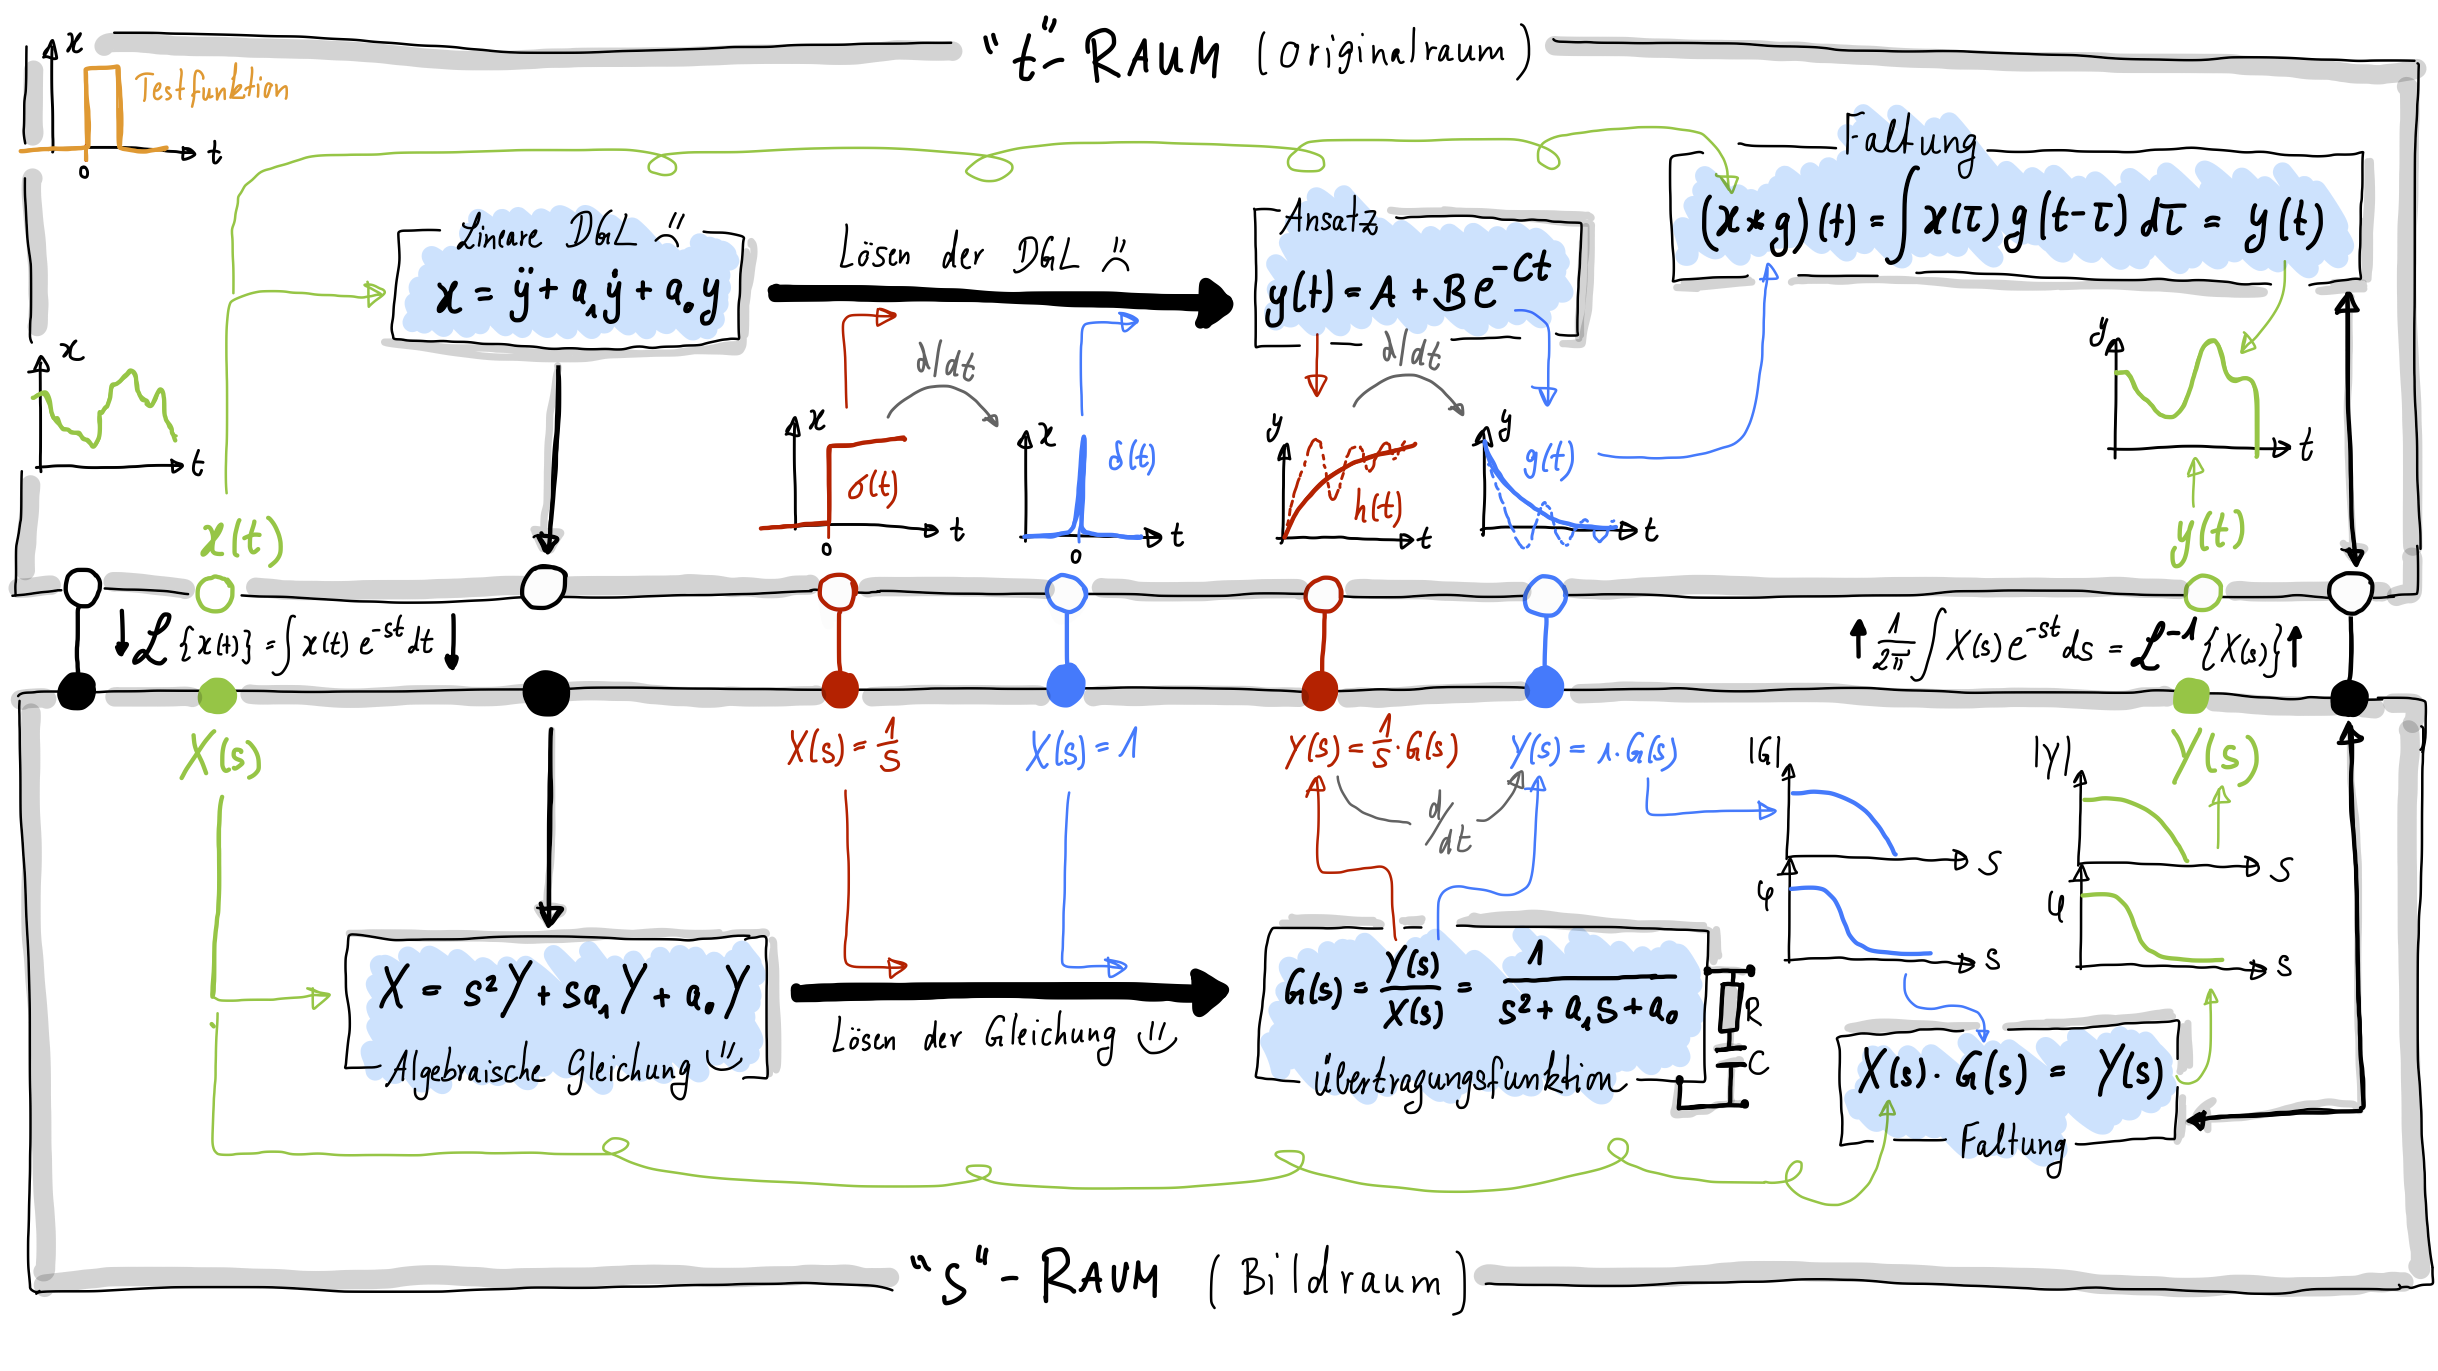

In [17]:
Image("pictures/t_s_draw.png", width=700)

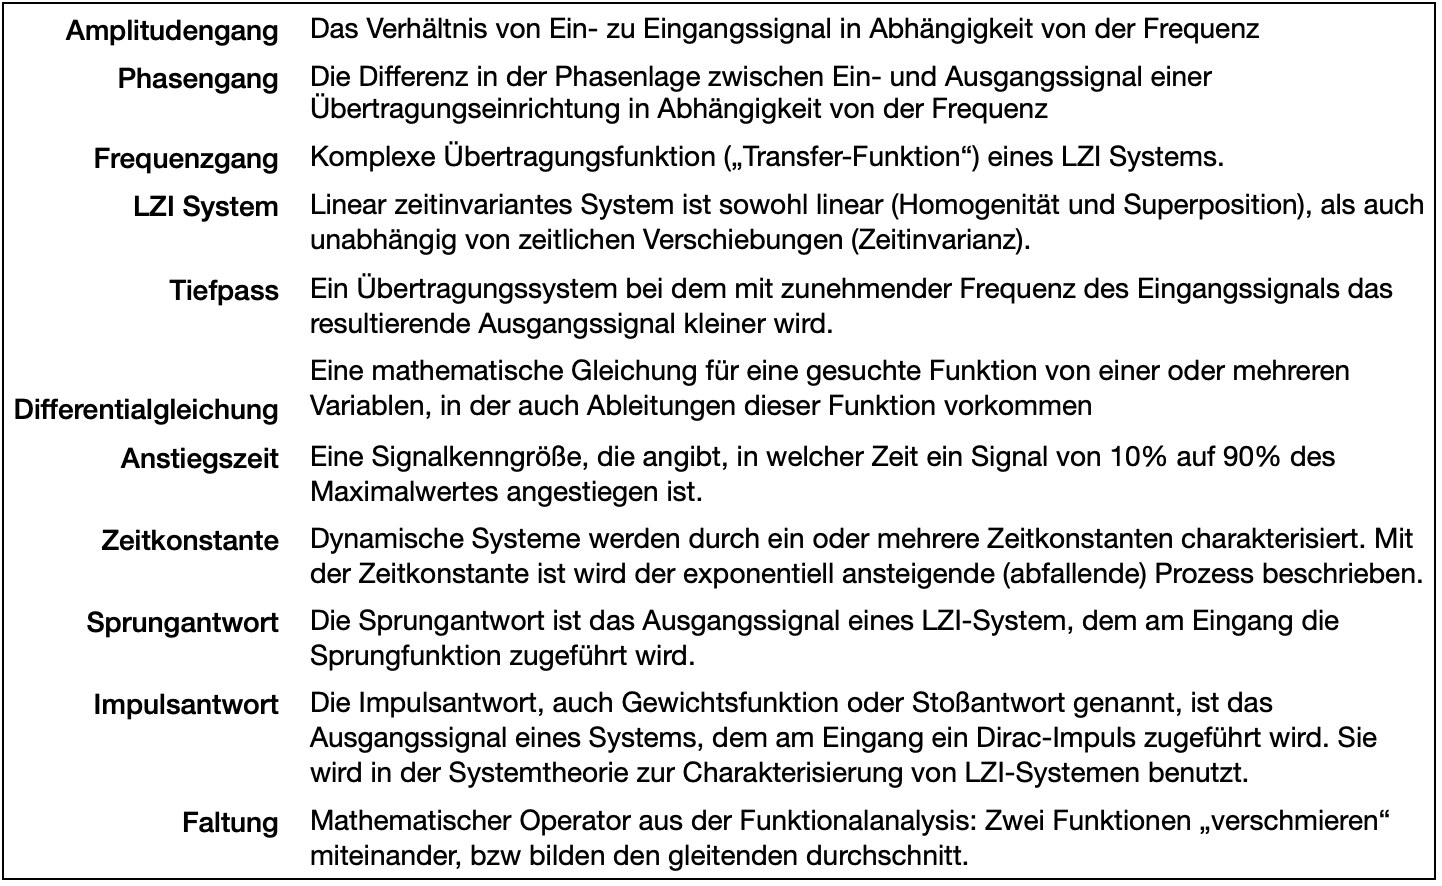

In [18]:
Image("pictures/zusammenfassung_6.png", width=700)